In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define project path
drive_path = '/content/drive/My Drive/Kuliah/Thesis/Eksperimen/'
result_path = f'{drive_path}Hasil/Progress Report/22-06-25/'
project_path = f'{drive_path}'
folder_path = f'{project_path}Dataset/ROCOv2/test/'

Mounted at /content/drive


In [ ]:
!pip install evaluate rouge rouge_score sacrebleu

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 7.6 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=50ffc51d1178bb0bffdc2c06cc9e0d67870fab97fc8717f533fac74933bbcbc0
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [ ]:
# Data handling and manipulArithmeticErroration
import os,textwrap,io,base64,datetime
import shutil
import json
import io as input_output
import pandas as pd
import numpy as np

# Machine learning and deep learning libraries
import torch
import random
import datasets
import transformers
# import evaluate
import seaborn as sns
from torch.utils.data import Dataset as TorchDataset, DataLoader
from torchvision.transforms import Resize

# Data augmentation and image processing
import albumentations as A
import cv2
from PIL import Image, UnidentifiedImageError

# Evaluation and metrics
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu, SmoothingFunction
from scipy.stats import pearsonr
from sklearn.metrics import accuracy_score, f1_score

# Utilities
import requests,random
import ast
from datasets import load_dataset, Dataset as Dataset, DatasetDict
from matplotlib import pyplot as plt
from tqdm import tqdm
import itertools
import gc
from textwrap import wrap
from pathlib import Path
import multiprocessing as mp
from sklearn.model_selection import train_test_split

# Model and training related imports
from transformers import TextStreamer, AutoProcessor, AutoModelForVision2Seq, BitsAndBytesConfig, Idefics3ForConditionalGeneration
from transformers import Trainer, TrainingArguments, AutoModel, BlipForConditionalGeneration
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, DataCollatorForSeq2Seq
from transformers import AutoTokenizer, GPT2Config, default_data_collator
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments, AutoProcessor, AutoModelForCausalLM, AutoModelForImageTextToText
from torch.nn.utils.rnn import pad_sequence
from peft import LoraConfig, get_peft_model

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if torch.cuda.is_available():
    print(f"There are {torch.cuda.device_count()} GPU(s) available.")
    print(f"We will use the GPU: {torch.cuda.get_device_name(0)}")
else:
    print("No GPU available, using the CPU instead.")

# Set pandas options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# Clear CUDA cache
torch.cuda.empty_cache()

# WandB login
import wandb
from huggingface_hub import login
login(token="your_token")
# wandb.login(key="your_token")

No GPU available, using the CPU instead.


In [ ]:
# Load dataset hasil inference (Pastikan file sudah sesuai format)
csv_name = 'G4ep full swinbase-medgpt2 bs4 cui n a s'
file_path = f"{result_path}{csv_name}.csv"

folder_path = os.path.join(result_path, csv_name)
os.makedirs(folder_path, exist_ok=True)
df = pd.read_csv(file_path)
df

,ID,Filename,Ref Caption,Predicted Caption,Sentence BLEU-1 Score,Sentence BLEU-2 Score,Sentence BLEU-3 Score,Sentence BLEU-4 Score,Corpus BLEU-1 Score,Corpus BLEU-2 Score,Corpus BLEU-3 Score,Corpus BLEU-4 Score,Sentence BLEU Score,Corpus BLEU Score,BLEU Score,ROUGE-1 Score,ROUGE-2 Score,ROUGE-L Score,ROUGE-Lsum Score,ROUGE-W Score,ROUGE-S Score,ROUGE-SU Score,CIDEr Score,WMD Score,BERTScorer Precision,BERTScorer Recall,BERTScorer F1,GLUE Score (F1),Exact Match (EM) Score,Pearson Correlation Score,Accuracy Score
0,0,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_000001.jpg,"Computed tomography of the chest, axial view, demonstrates a large ascending aortic aneurysm.",contrast-enhanced computed tomography of the chest with intravenous contrast demonstrates a large right-sided pulmonary embolism.,0.169231,0.288928,0.305757,0.287662,0.169231,0.288928,0.305757,0.287662,0.287662,0.287662,0.228942,0.533333,0.428571,0.533333,0.533333,0,0,0,0.0,0.501693,0.780206,0.840913,0.809423,0.0,0.0,0.929750,0.0
1,1,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_000002.jpg,Computed tomography shows floating thrombosis.,intracardiac contrast-enhanced computed tomography angiography demonstrates a thrombosis in the left main coronary artery.,0.162602,0.282391,0.300787,0.283905,0.162602,0.282391,0.300787,0.283905,0.283905,0.283905,0.000000,0.300000,0.111111,0.300000,0.300000,0,0,0,0.0,0.872025,0.674762,0.833618,0.745825,0.0,0.0,0.550386,0.0
2,2,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_000003.jpg,Digitally subtracted angiogram demonstrates active extravasation of the superior rectal artery into the ileal-conduit.,embolization angiogram of the superior mesenteric artery.,0.350877,0.396073,0.368297,0.327043,0.350877,0.396073,0.368297,0.327043,0.327043,0.327043,0.000000,0.454545,0.200000,0.454545,0.454545,0,0,0,0.0,0.610167,0.815319,0.710233,0.759157,0.0,0.0,0.847842,0.0
3,3,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_000004.jpg,Digitally subtracted angiogram of the inferior mesenteric artery demonstrated cessation of flow through the proximal superior rectal artery in the region of the intersection between the artery and ureter with retained perfusion of the rectosigmoid region and resolution of active extravasation.,embolization angiogram demonstrates a pseudoaneurysm of the right internal iliac artery.,0.238636,0.335765,0.334397,0.306164,0.238636,0.335765,0.334397,0.306164,0.306164,0.306164,0.000000,0.153846,0.040000,0.153846,0.153846,0,0,0,0.0,0.698037,0.734996,0.637824,0.682971,0.0,0.0,0.918383,0.0
4,4,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_000005.jpg,Computed tomography demonstrates angle measurement of a Type 1 canal.,sagittal plain x-ray of the cranium.,0.486486,0.451668,0.395767,0.342409,0.486486,0.451668,0.395767,0.342409,0.342409,0.342409,0.000000,0.117647,0.000000,0.117647,0.117647,0,0,0,0.0,0.847371,0.709499,0.664132,0.686066,0.0,0.0,0.623666,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9967,9967,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_009968.jpg,"The intra-atrial septum is absent near the superior vena cava, compatible with a sinus venosus atrial septal defect.","contrast-enhanced computed tomography scan of the chest shows a large, heterogeneously enhancing mass in the right lower lobe, consistent with a pulmonary embolus.",0.134146,0.260262,0.286853,0.274887,0.134146,0.260262,0.286853,0.274887,0.274887,0.274887,0.000000,0.186047,0.048780,0.186047,0.186047,0,0,0,0.0,0.837102,0.613753,0.606141,0.609923,0.0,0.0,0.824602,0.0
9968,9968,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_009969.jpg,Partial anomalous pulmonary venous return of a right upper lobe pulmonary vein is seen to drain into the right superior vena cava instead of the left atrium. The main and right pulmonary arteries are dilated with respect to the ascending aorta.,"contrast-enhanced computed tomography of the chest shows a pseudoaneurysm of the ascending aort

In [ ]:
# Menggunakan describe() untuk melihat statistik deskriptif
print(df.describe())

                ID  Sentence BLEU-1 Score  Sentence BLEU-2 Score  Sentence BLEU-3 Score  Sentence BLEU-4 Score  Corpus BLEU-1 Score  Corpus BLEU-2 Score  Corpus BLEU-3 Score  Corpus BLEU-4 Score  Sentence BLEU Score  Corpus BLEU Score   BLEU Score  ROUGE-1 Score  ROUGE-2 Score  ROUGE-L Score  ROUGE-Lsum Score  ROUGE-W Score  ROUGE-S Score  ROUGE-SU Score  CIDEr Score    WMD Score  BERTScorer Precision  BERTScorer Recall  BERTScorer F1  GLUE Score (F1)  Exact Match (EM) Score  Pearson Correlation Score  Accuracy Score
count  9972.000000            9972.000000            9972.000000            9972.000000            9972.000000          9972.000000          9972.000000          9972.000000          9972.000000          9972.000000        9972.000000  9972.000000    9972.000000    9972.000000    9972.000000       9972.000000         9972.0         9972.0          9972.0       9972.0  9972.000000           9972.000000        9972.000000    9972.000000           9972.0                  9972

In [ ]:
results_df = pd.read_csv(f'{folder_path}/{csv_name}_BERTScore_Evaluation.csv')
results_df

,Filename,emilyalsentzer/Bio_ClinicalBERT_Precision,emilyalsentzer/Bio_ClinicalBERT_Recall,emilyalsentzer/Bio_ClinicalBERT_F1,dmis-lab/biobert-v1.1_Precision,dmis-lab/biobert-v1.1_Recall,dmis-lab/biobert-v1.1_F1,microsoft/deberta-xlarge-mnli_Precision,microsoft/deberta-xlarge-mnli_Recall,microsoft/deberta-xlarge-mnli_F1,distilbert-base-uncased_Precision,distilbert-base-uncased_Recall,distilbert-base-uncased_F1,microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract_Precision,microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract_Recall,microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract_F1
0,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_000001.jpg,0.813843,0.842111,0.827736,0.791834,0.813090,0.802321,0.742134,0.757977,0.749972,0.865914,0.873199,0.869542,0.900375,0.920001,0.910082
1,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_000002.jpg,0.775542,0.888855,0.828341,0.771100,0.860494,0.813348,0.676937,0.830590,0.745933,0.822506,0.906379,0.862408,0.862140,0.932723,0.896044
2,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_000003.jpg,0.834340,0.765185,0.798268,0.826352,0.766655,0.795385,0.807783,0.687816,0.742988,0.869763,0.848513,0.859006,0.915997,0.893101,0.904404
3,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_000004.jpg,0.814424,0.752306,0.782134,0.789281,0.722891,0.754628,0.722423,0.637486,0.677302,0.867298,0.810035,0.837689,0.905106,0.877948,0.891320
4,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_000005.jpg,0.735041,0.735506,0.735273,0.733276,0.707336,0.720072,0.665596,0.641161,0.653150,0.745040,0.773042,0.758782,0.851044,0.881614,0.866060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9967,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_009968.jpg,0.681880,0.656726,0.669067,0.702636,0.684077,0.693232,0.627745,0.615191,0.621404,0.782084,0.800043,0.790962,0.823144,0.845170,0.834011
9968,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_009969.jpg,0.781038,0.719780,0.749159,0.772902,0.719917,0.745469,0.682401,0.599436,0.638234,0.838519,0.801562,0.819624,0.843005,0.850050,0.846513
9969,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_009970.jpg,0.752114,0.775589,0.763671,0.775998,0.817027,0.795985,0.687801,0.694716,0.691241,0.777007,0.828699,0.802021,0.832697,0.860170,0.846210
9970,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_009971.jpg,0.870458,0.834310,0.852000,0.857741,0.837021,0.847254,0.794053,0.724607,0.757742,0.889103,0.867610,0.878225,0.938744,0.911127,0.924729


In [ ]:
# Menggunakan describe() untuk melihat statistik deskriptif
print(results_df.describe())

       emilyalsentzer/Bio_ClinicalBERT_Precision  emilyalsentzer/Bio_ClinicalBERT_Recall  emilyalsentzer/Bio_ClinicalBERT_F1  dmis-lab/biobert-v1.1_Precision  dmis-lab/biobert-v1.1_Recall  dmis-lab/biobert-v1.1_F1  microsoft/deberta-xlarge-mnli_Precision  microsoft/deberta-xlarge-mnli_Recall  microsoft/deberta-xlarge-mnli_F1  distilbert-base-uncased_Precision  distilbert-base-uncased_Recall  distilbert-base-uncased_F1  microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract_Precision  microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract_Recall  microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract_F1
count                                9972.000000                             9972.000000                         9972.000000                      9972.000000                   9972.000000               9972.000000                              9972.000000                           9972.000000                       9972.000000                        9972.000000                     9972.000000   

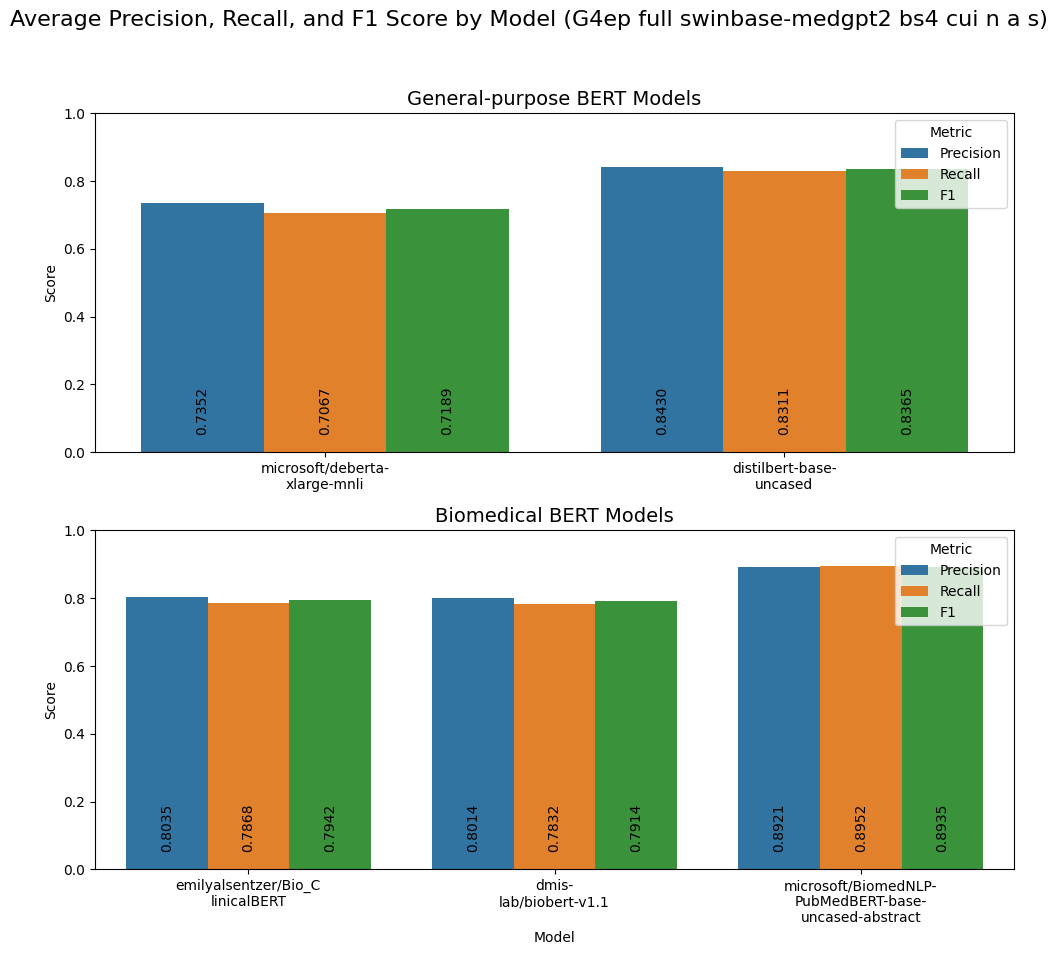

✅ Dua subplot disimpan di: /content/drive/My Drive/Kuliah/Thesis/Eksperimen/Hasil/Progress Report/22-06-25/G4ep full swinbase-medgpt2 bs4 cui n a s/G4ep full swinbase-medgpt2 bs4 cui n a s_bert_evaluation_subplots.png


In [ ]:
# Pilihan Model BERT untuk Evaluasi
model_num_layers = {
    # 🔹 Model umum (jumlah layer sesuai dokumentasi atau default bert-score)
    "emilyalsentzer/Bio_ClinicalBERT": 12,
    # "cambridgeltl/SapBERT-from-PubMedBERT-fulltext": 12,
    "dmis-lab/biobert-v1.1": 12,
    "microsoft/deberta-xlarge-mnli": 23,  # DeBERTa XLarge: 24 layer encoder, tapi BERTScore default pakai 23
    # "roberta-large": 17,                  # RoBERTa Large: default bert-score pakai layer ke-17 (dari 24)
    "distilbert-base-uncased": 5,         # DistilBERT: hanya punya 6 layer, BERTScore pakai layer ke-5
    # "bert-base-multilingual-cased": 9,    # Multilingual BERT: 12 layer total, BERTScore default pakai layer ke-9

    # 🩺 Model domain medis (semua berbasis BERT-base dengan 12 layer encoder)
    # "dmis-lab/biobert-base-cased-v1.1": 12,  # BioBERT berbasis BERT-base: 12 encoder layers
    "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract": 12,  # PubMedBERT dilatih dari awal, 12 layers
    # "bionlp/bluebert_pubmed_mimic_uncased_L-12_H-768_A-12": 12,  # BlueBERT config = BERT-base (12 layers, 768 hidden)
    # "emilyalsentzer/Bio_ClinicalBERT": 12,  # ClinicalBERT berbasis BERT-base (fine-tuned dari BioBERT)
}

bert_models = model_num_layers.keys()

# Bagi model menjadi dua grup
general_models = [
    "microsoft/deberta-xlarge-mnli",
    # "roberta-large",
    "distilbert-base-uncased",
    # "bert-base-multilingual-cased"
]

medical_models = [
    # "dmis-lab/biobert-base-cased-v1.1",
    "emilyalsentzer/Bio_ClinicalBERT",
    # "cambridgeltl/SapBERT-from-PubMedBERT-fulltext",
    "dmis-lab/biobert-v1.1",
    "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract",
    # "bionlp/bluebert_pubmed_mimic_uncased_L-12_H-768_A-12",
    # "emilyalsentzer/Bio_ClinicalBERT"
]

# Pastikan tidak ada nilai 0 atau nilai sangat kecil
for model in bert_models:
    for metric in ['Precision', 'Recall', 'F1']:
        col_name = f"{model}_{metric}"
        if col_name in results_df.columns:
            results_df[col_name] = results_df[col_name].apply(lambda x: np.nan if x == 0 else x)

results_df.replace({0: np.nan, 1e-9: np.nan}, inplace=True)

# Bangun plot_df
plot_data = []
for model in bert_models:
    for metric in ['Precision', 'Recall', 'F1']:
        col_name = f"{model}_{metric}"
        if col_name in results_df.columns:
            avg_score = results_df[col_name].dropna().mean()
            plot_data.append([model, metric, avg_score])

plot_df = pd.DataFrame(plot_data, columns=['Model', 'Metric', 'Score'])

# Bungkus nama model agar tidak kepanjangan
model_name_wrapped = {
    model: '\n'.join(textwrap.wrap(model, width=20))
    for model in bert_models
}
plot_df['Model'] = plot_df['Model'].map(model_name_wrapped)

# Pisahkan plot_df menjadi 2
general_plot_df = plot_df[plot_df['Model'].isin([model_name_wrapped[m] for m in general_models])]
medical_plot_df = plot_df[plot_df['Model'].isin([model_name_wrapped[m] for m in medical_models])]

# Buat subplot vertikal
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharey=True)

# Plot untuk general-purpose models
sns.barplot(data=general_plot_df, x='Model', y='Score', hue='Metric', ax=axes[0])
axes[0].set_title("General-purpose BERT Models", fontsize=14)
axes[0].set_ylabel("Score")
axes[0].set_xlabel("")
axes[0].set_ylim(0, 1)

# Tambahkan label skor
for p in axes[0].patches:
    height = p.get_height()
    if not np.isnan(height) and height > 0.001:
        axes[0].annotate(f'{height:.4f}', (p.get_x() + p.get_width() / 2., 0.05),
                         ha='center', va='bottom', fontsize=10, rotation=90)

# Plot untuk medical BERT models
sns.barplot(data=medical_plot_df, x='Model', y='Score', hue='Metric', ax=axes[1])
axes[1].set_title("Biomedical BERT Models", fontsize=14)
axes[1].set_ylabel("Score")
axes[1].set_xlabel("Model")
axes[1].set_ylim(0, 1)

for p in axes[1].patches:
    height = p.get_height()
    if not np.isnan(height) and height > 0.001:
        axes[1].annotate(f'{height:.4f}', (p.get_x() + p.get_width() / 2., 0.05),
                         ha='center', va='bottom', fontsize=10, rotation=90)

# Atur label sumbu X agar terbaca
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(0)
        label.set_ha('center')

plt.suptitle(f"Average Precision, Recall, and F1 Score by Model ({csv_name})", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Simpan dan tampilkan plot
save_path = os.path.join(folder_path, f"{csv_name}_bert_evaluation_subplots.png")
plt.savefig(save_path)
plt.show()

print(f"✅ Dua subplot disimpan di: {save_path}")

In [ ]:
print(results_df.head())
print(results_df.isna().sum())  # Cek apakah ada NaN

                                                     Filename  emilyalsentzer/Bio_ClinicalBERT_Precision  emilyalsentzer/Bio_ClinicalBERT_Recall  emilyalsentzer/Bio_ClinicalBERT_F1  dmis-lab/biobert-v1.1_Precision  dmis-lab/biobert-v1.1_Recall  dmis-lab/biobert-v1.1_F1  microsoft/deberta-xlarge-mnli_Precision  microsoft/deberta-xlarge-mnli_Recall  microsoft/deberta-xlarge-mnli_F1  distilbert-base-uncased_Precision  distilbert-base-uncased_Recall  distilbert-base-uncased_F1  microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract_Precision  microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract_Recall  microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract_F1
0  /kaggle/input/rocov2-test/test/ROCOv2_2023_test_000001.jpg                                   0.813843                                0.842111                            0.827736                         0.791834                      0.813090                  0.802321                                 0.742134                              

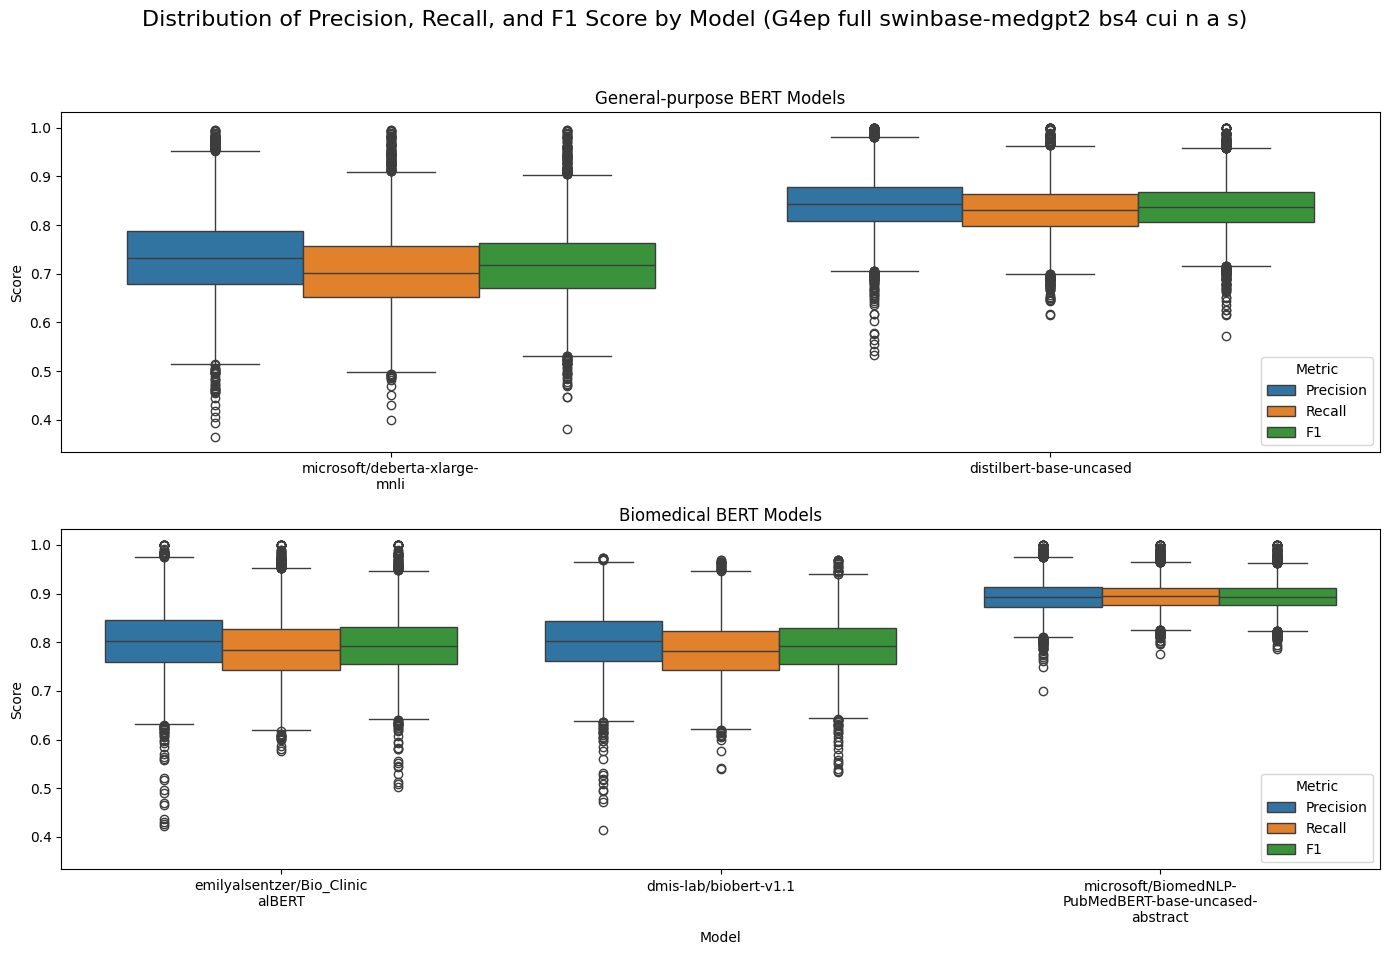

✅ Boxplot per model dan metrik disimpan di: /content/drive/My Drive/Kuliah/Thesis/Eksperimen/Hasil/Progress Report/22-06-25/G4ep full swinbase-medgpt2 bs4 cui n a s/G4ep full swinbase-medgpt2 bs4 cui n a s_bert_metrics_boxplot_grouped_by_model.png


In [ ]:
# Fungsi untuk ubah ke format long
def melt_metrics(results_df, models, label):
    melted = []
    for model in models:
        for metric in ['Precision', 'Recall', 'F1']:
            col = f"{model}_{metric}"
            if col in results_df.columns:
                for val in results_df[col].dropna():
                    melted.append({
                        "Model": model,
                        "Metric": metric,
                        "Score": val,
                        "Group": label
                    })
    return pd.DataFrame(melted)

# Gabungkan semua ke dalam satu DataFrame
df_general = melt_metrics(results_df, general_models, "General")
df_medical = melt_metrics(results_df, medical_models, "Medical")
melted_df = pd.concat([df_general, df_medical], ignore_index=True)

# Bungkus label model untuk tampil rapi
import textwrap
melted_df['Model'] = melted_df['Model'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=25)))

# Buat 2 subplot (1 utk general, 1 utk medical)
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharey=True)

# Plot untuk General-purpose models
sns.boxplot(data=melted_df[melted_df["Group"] == "General"], x="Model", y="Score", hue="Metric", ax=axes[0])
axes[0].set_title("General-purpose BERT Models")
axes[0].set_ylabel("Score")
axes[0].set_xlabel("")

# Plot untuk Biomedical models
sns.boxplot(data=melted_df[melted_df["Group"] == "Medical"], x="Model", y="Score", hue="Metric", ax=axes[1])
axes[1].set_title("Biomedical BERT Models")
axes[1].set_ylabel("Score")
axes[1].set_xlabel("Model")

# Supertitle dan layout
plt.suptitle(f"Distribution of Precision, Recall, and F1 Score by Model ({csv_name})", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Simpan dan tampilkan
save_path = os.path.join(folder_path, f"{csv_name}_bert_metrics_boxplot_grouped_by_model.png")
plt.savefig(save_path)
plt.show()

print(f"✅ Boxplot per model dan metrik disimpan di: {save_path}")

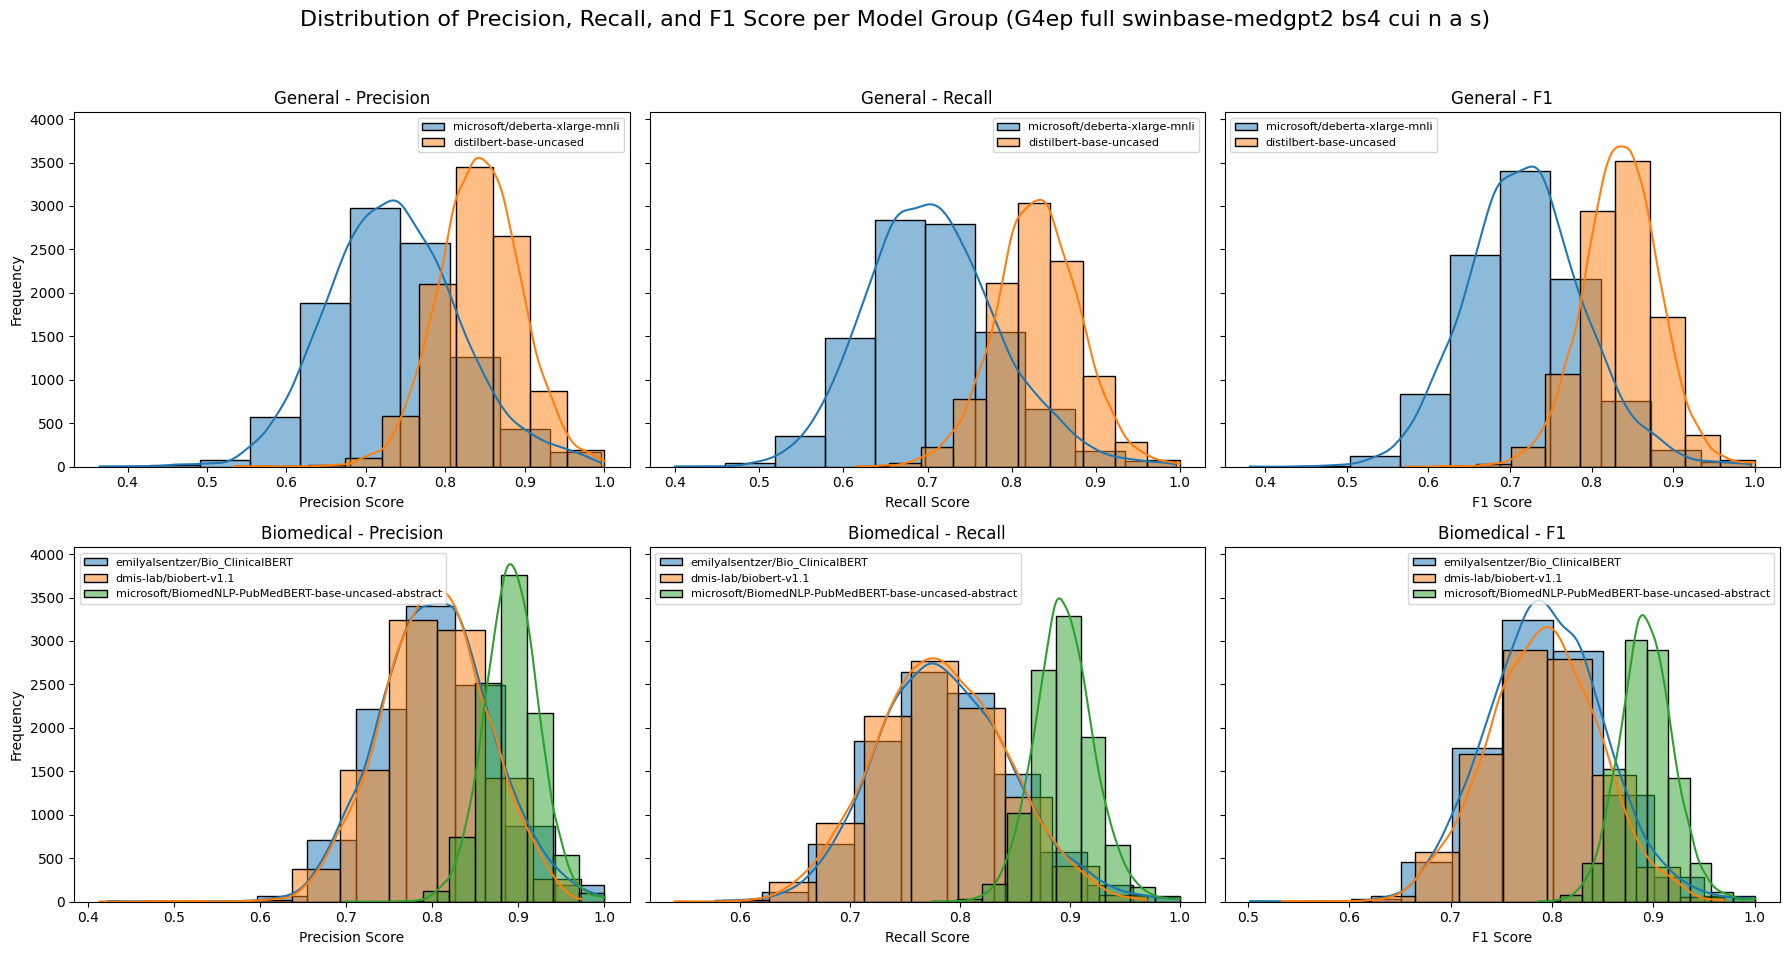

✅ Plot histogram disimpan di: /content/drive/My Drive/Kuliah/Thesis/Eksperimen/Hasil/Progress Report/22-06-25/G4ep full swinbase-medgpt2 bs4 cui n a s/G4ep full swinbase-medgpt2 bs4 cui n a s_bert_metrics_histogram_subplots.png


In [ ]:
metrics = ['Precision', 'Recall', 'F1']

# Create subplots: 2 baris, 3 kolom (untuk masing-masing metrik)
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

# Plot untuk general-purpose models (baris atas)
for i, metric in enumerate(metrics):
    ax = axes[0, i]
    for model in general_models:
        col = f"{model}_{metric}"
        if col in results_df.columns:
            sns.histplot(results_df[col], kde=True, bins=10, label=model, ax=ax)
    ax.set(title=f"General - {metric}", xlabel=f"{metric} Score", ylabel="Frequency")
    ax.legend(fontsize=8)

# Plot untuk biomedical models (baris bawah)
for i, metric in enumerate(metrics):
    ax = axes[1, i]
    for model in medical_models:
        col = f"{model}_{metric}"
        if col in results_df.columns:
            sns.histplot(results_df[col], kde=True, bins=10, label=model, ax=ax)
    ax.set(title=f"Biomedical - {metric}", xlabel=f"{metric} Score", ylabel="Frequency")
    ax.legend(fontsize=8)

# Supertitle dan layout
plt.suptitle(f"Distribution of Precision, Recall, and F1 Score per Model Group ({csv_name})", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Atur ruang agar tidak menabrak

# Save and show
save_path = os.path.join(folder_path, f"{csv_name}_bert_metrics_histogram_subplots.png")
plt.savefig(save_path)
plt.show()

print(f"✅ Plot histogram disimpan di: {save_path}")

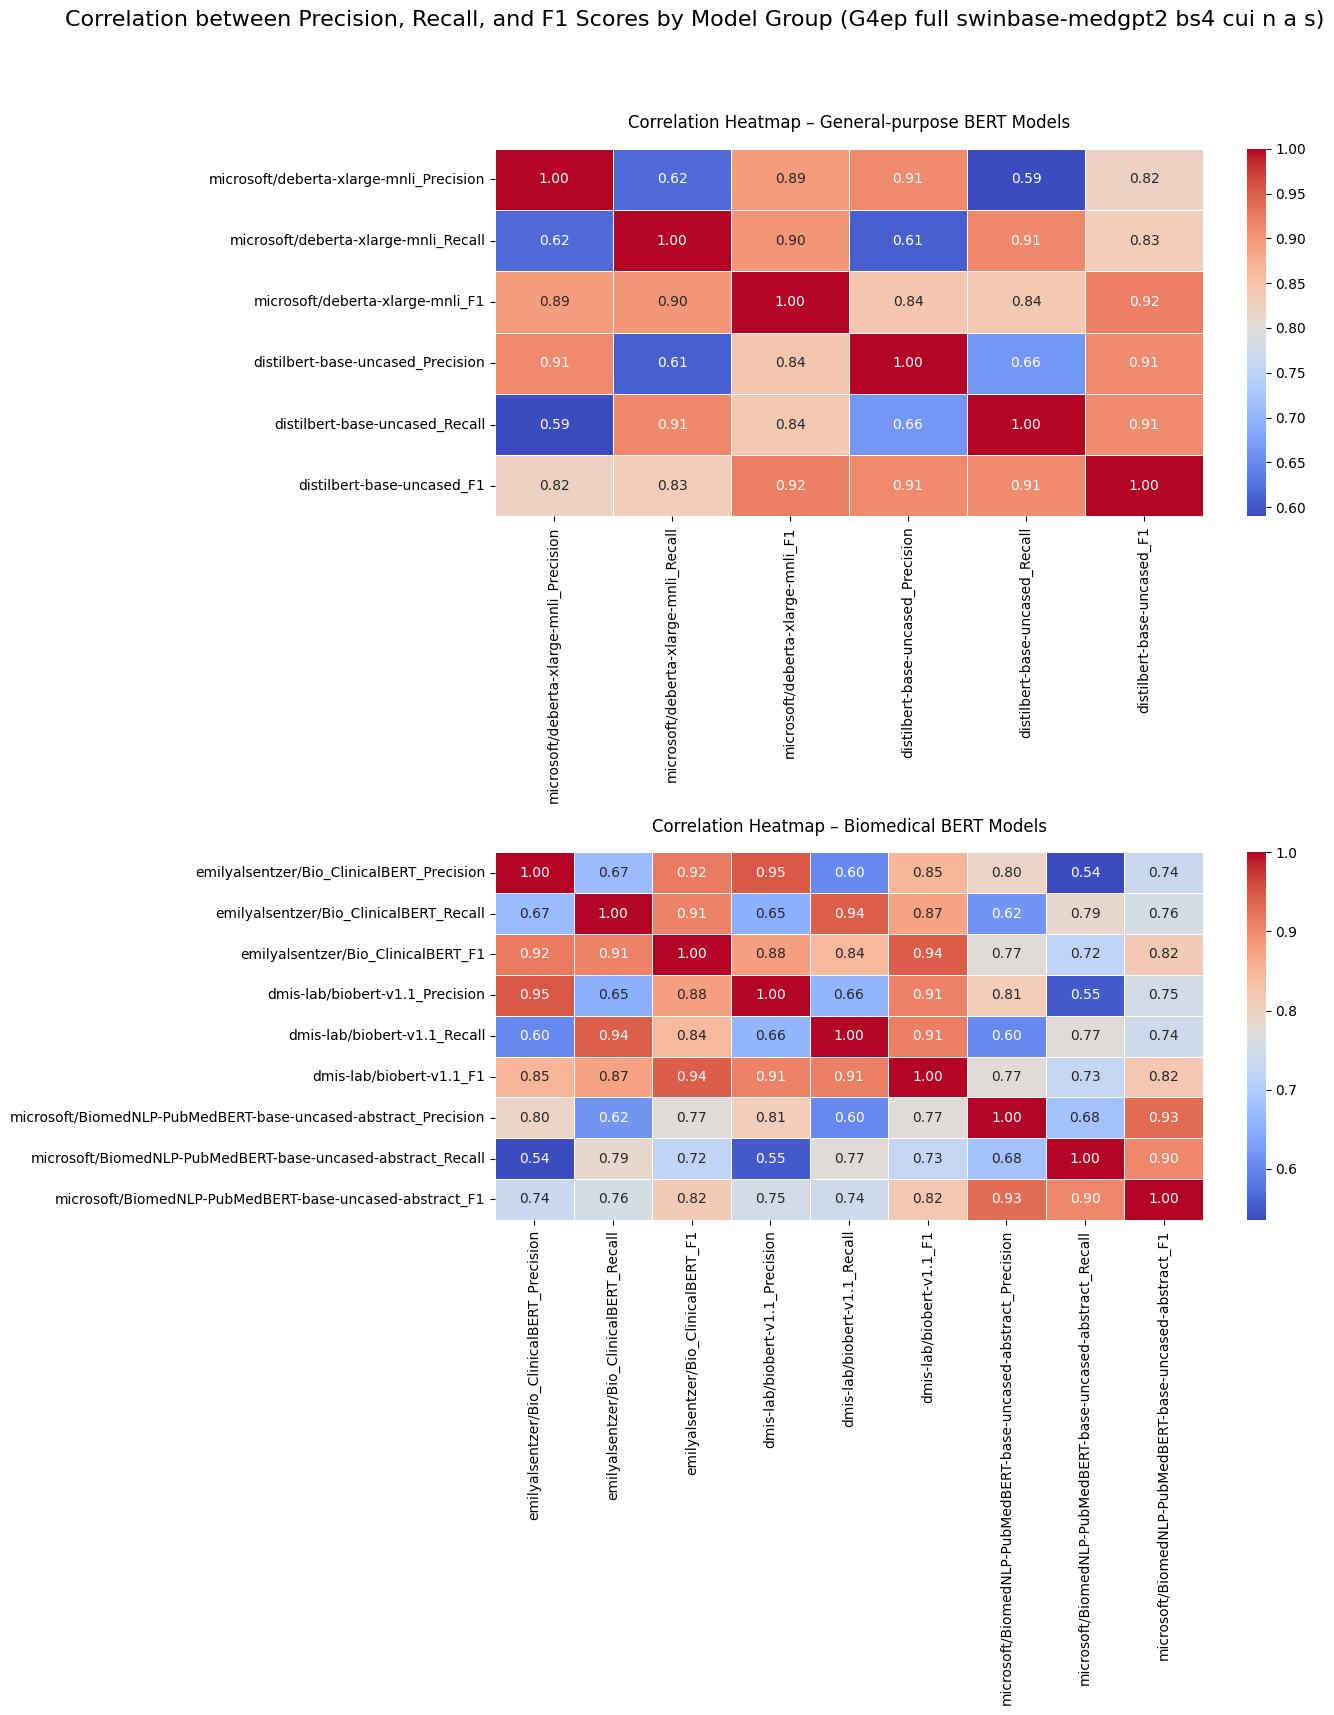

✅ Heatmap korelasi disimpan di: /content/drive/My Drive/Kuliah/Thesis/Eksperimen/Hasil/Progress Report/22-06-25/G4ep full swinbase-medgpt2 bs4 cui n a s/G4ep full swinbase-medgpt2 bs4 cui n a s_bert_metrics_correlation_heatmap_subplots.png


In [ ]:
# Ambil kolom-kolom hasil metrik untuk masing-masing grup
general_cols = [f"{model}_{metric}" for model in general_models for metric in ['Precision', 'Recall', 'F1'] if f"{model}_{metric}" in results_df.columns]
medical_cols = [f"{model}_{metric}" for model in medical_models for metric in ['Precision', 'Recall', 'F1'] if f"{model}_{metric}" in results_df.columns]

# Hitung matriks korelasi
corr_general = results_df[general_cols].corr()
corr_medical = results_df[medical_cols].corr()

# Buat dua heatmap dalam subplot vertikal
fig, axes = plt.subplots(2, 1, figsize=(14, 18))

sns.heatmap(corr_general, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title("Correlation Heatmap – General-purpose BERT Models", pad=15)

sns.heatmap(corr_medical, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title("Correlation Heatmap – Biomedical BERT Models", pad=15)

# Judul keseluruhan dan layout
plt.suptitle(f"Correlation between Precision, Recall, and F1 Scores by Model Group ({csv_name})", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Simpan dan tampilkan
save_path = os.path.join(folder_path, f"{csv_name}_bert_metrics_correlation_heatmap_subplots.png")
plt.savefig(save_path)
plt.show()

print(f"✅ Heatmap korelasi disimpan di: {save_path}")

In [ ]:
def plot_model_metrics_distribution(results_df, model_name, color='skyblue',csv_name=csv_name, folder_path=folder_path):
    """
    Buat histogram distribusi Precision, Recall, dan F1 untuk satu model,
    lengkap dengan garis mean, median, min, max, dan std.

    Args:
        results_df (pd.DataFrame): DataFrame yang berisi metrik model.
        model_name (str): Nama model (prefix kolom, seperti 'BioBERT').
        csv_name (str): Nama file CSV sebagai label plot dan nama file output.
        folder_path (str): Lokasi folder untuk menyimpan plot.

    Returns:
        str: Path ke file gambar yang disimpan.
    """
    metrics = ['Precision', 'Recall', 'F1']
    fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

    for i, metric in enumerate(metrics):
        ax = axes[i]
        col = f"{model_name}_{metric}"

        if col not in results_df.columns:
            ax.set_title(f"{model_name} - {metric} (No Data)")
            continue

        data = results_df[col].dropna()

        # Statistik
        mean_val = data.mean()
        median_val = data.median()
        std_val = data.std()
        min_val = data.min()
        max_val = data.max()

        # Histogram
        counts, bins, patches = ax.hist(data, bins=20, color=color, alpha=0.7)

        # Garis vertikal statistik
        ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.3f}')
        ax.axvline(median_val, color='orange', linestyle='dotted', linewidth=2, label=f'Median: {median_val:.3f}')
        ax.axvline(min_val, color='purple', linestyle='solid', linewidth=2, label=f'Min: {min_val:.3f}')
        ax.axvline(max_val, color='green', linestyle='dashdot', linewidth=2, label=f'Max: {max_val:.3f}')
        ax.axvline(mean_val + std_val, color='gray', linestyle='dashed', linewidth=1.5, label=f'+1σ: {mean_val + std_val:.3f}')
        ax.axvline(mean_val - std_val, color='gray', linestyle='dashed', linewidth=1.5, label=f'-1σ: {mean_val - std_val:.3f}')

        # Tambahkan garis untuk tiap bar (opsional)
        for count, x in zip(counts, bins):
            ax.plot([x, x], [0, count], color='black', linewidth=0.5)

        # Label
        ax.set_title(f'{model_name} - {metric}', fontsize=14)
        ax.set_xlabel(f'{metric} Score', fontsize=12)
        ax.set_ylabel('Frequency', fontsize=12)
        ax.legend(fontsize=10)

    plt.suptitle(f"{model_name} - Metric Distribution ({csv_name})", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.93])
    model_name = model_name.replace('/','-')
    save_path = os.path.join(folder_path, f"/{csv_name}_{model_name}_metric_distribution.png")
    plt.savefig(save_path)
    plt.show()

    print(f"✅ Plot histogram disimpan di: {save_path}")
    return save_path

In [ ]:
folder_path

'/content/drive/My Drive/Kuliah/Thesis/Eksperimen/Hasil/Progress Report/22-06-25/G4ep full swinbase-medgpt2 bs4 cui n a s'

In [ ]:
model_colors = {
    "emilyalsentzer/Bio_ClinicalBERT": "mediumblue",
    "dmis-lab/biobert-v1.1": "darkgreen",
    "microsoft/deberta-xlarge-mnli": "firebrick",
    "distilbert-base-uncased": "darkorange",
    "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract": "teal"
}

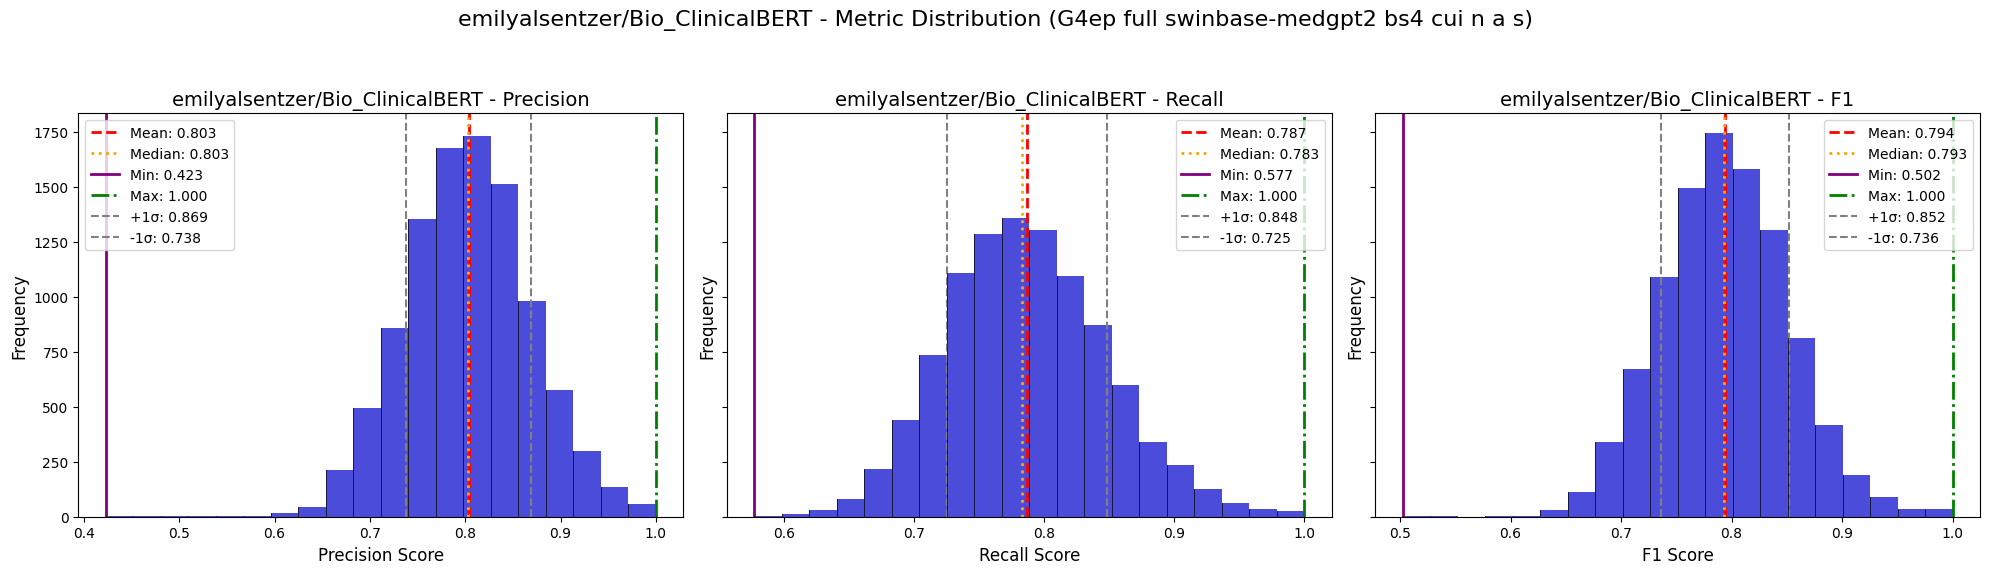

✅ Plot histogram disimpan di: /G4ep full swinbase-medgpt2 bs4 cui n a s_emilyalsentzer-Bio_ClinicalBERT_metric_distribution.png


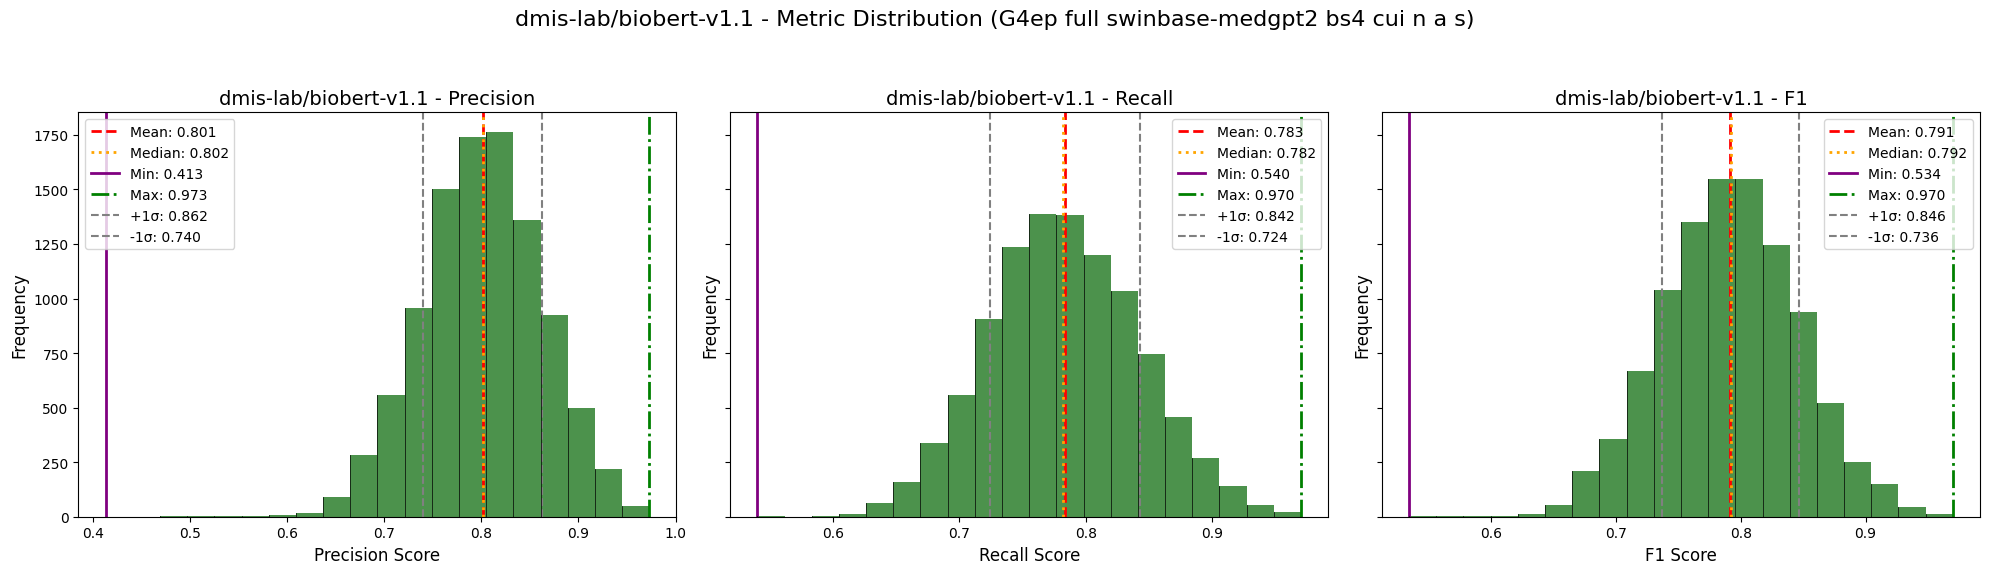

✅ Plot histogram disimpan di: /G4ep full swinbase-medgpt2 bs4 cui n a s_dmis-lab-biobert-v1.1_metric_distribution.png


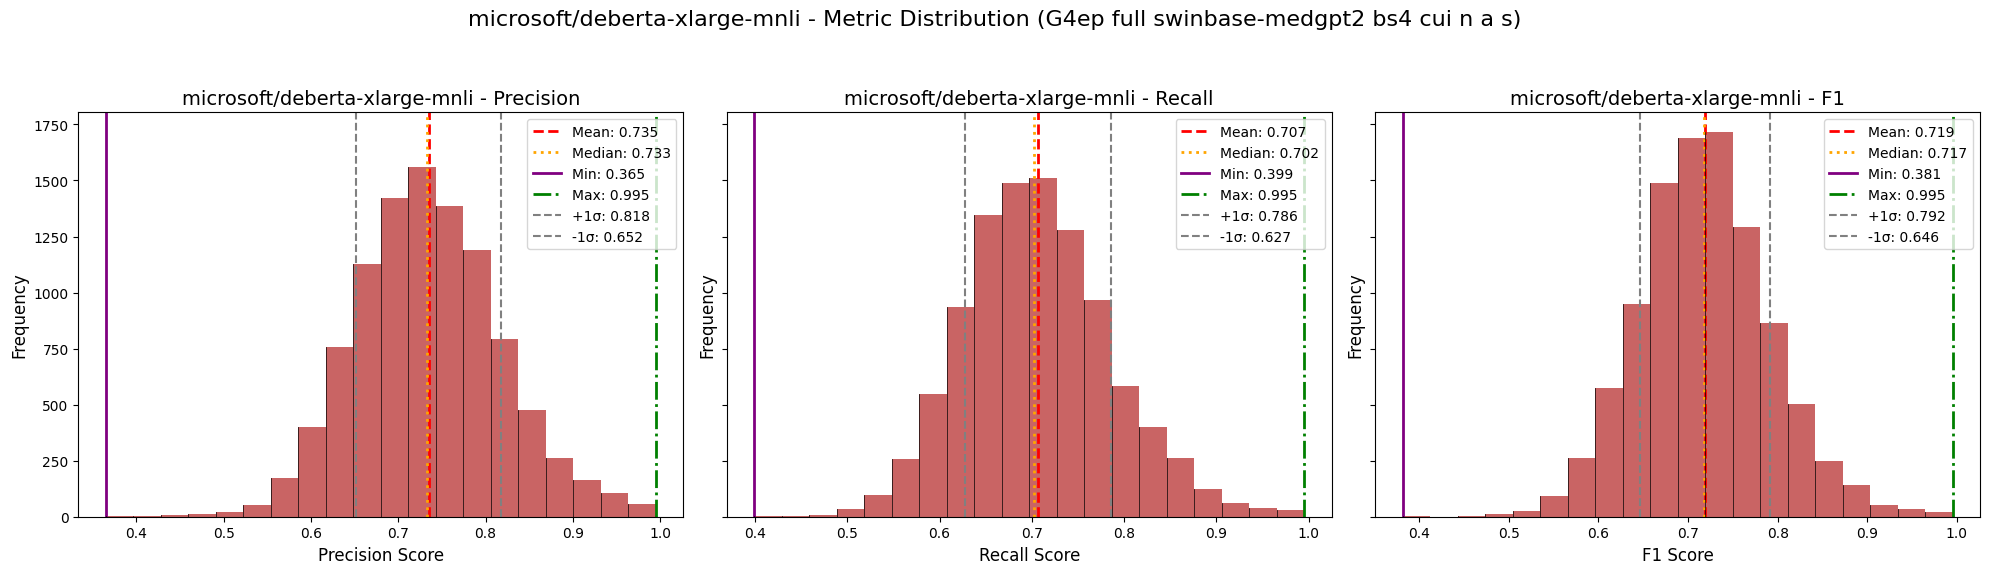

✅ Plot histogram disimpan di: /G4ep full swinbase-medgpt2 bs4 cui n a s_microsoft-deberta-xlarge-mnli_metric_distribution.png


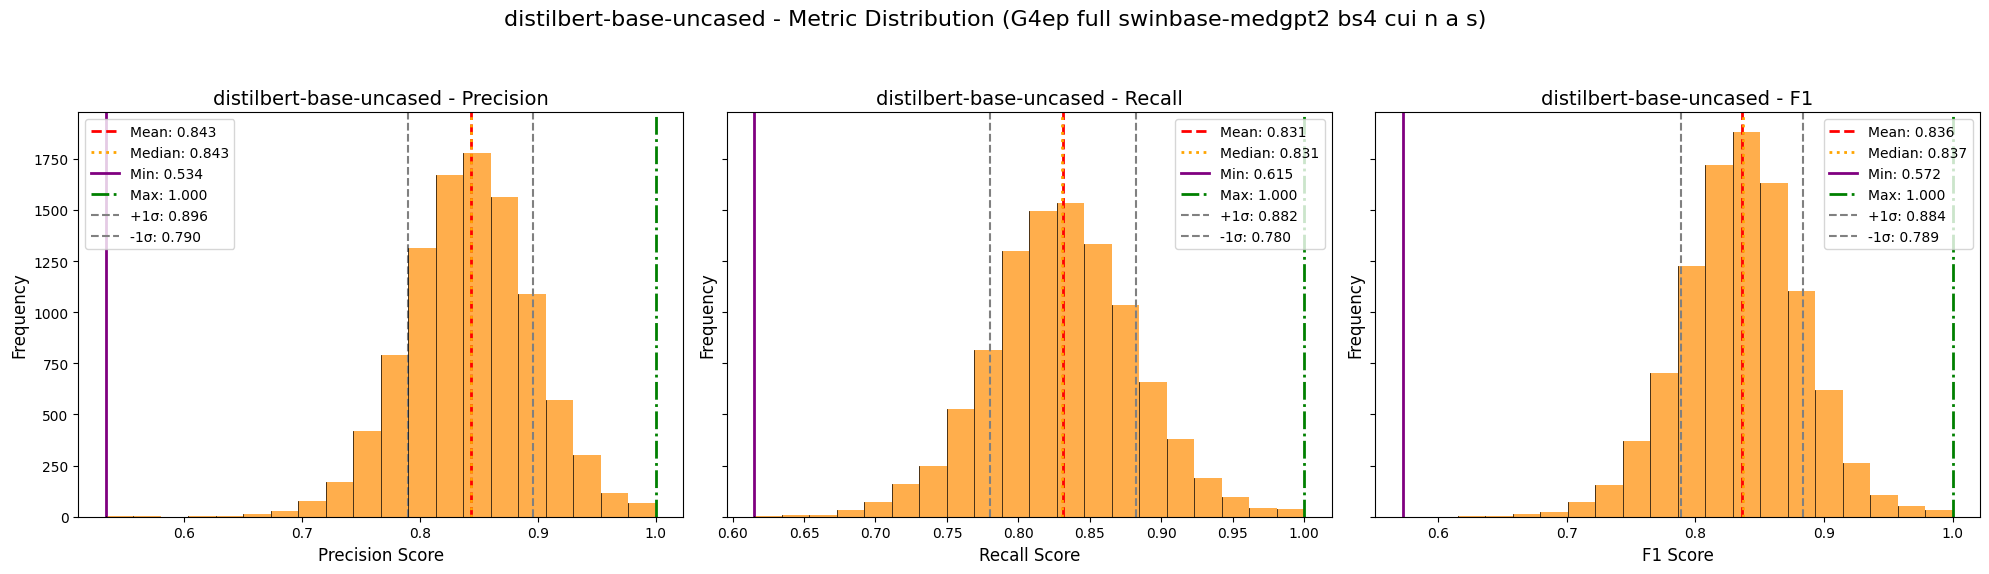

✅ Plot histogram disimpan di: /G4ep full swinbase-medgpt2 bs4 cui n a s_distilbert-base-uncased_metric_distribution.png


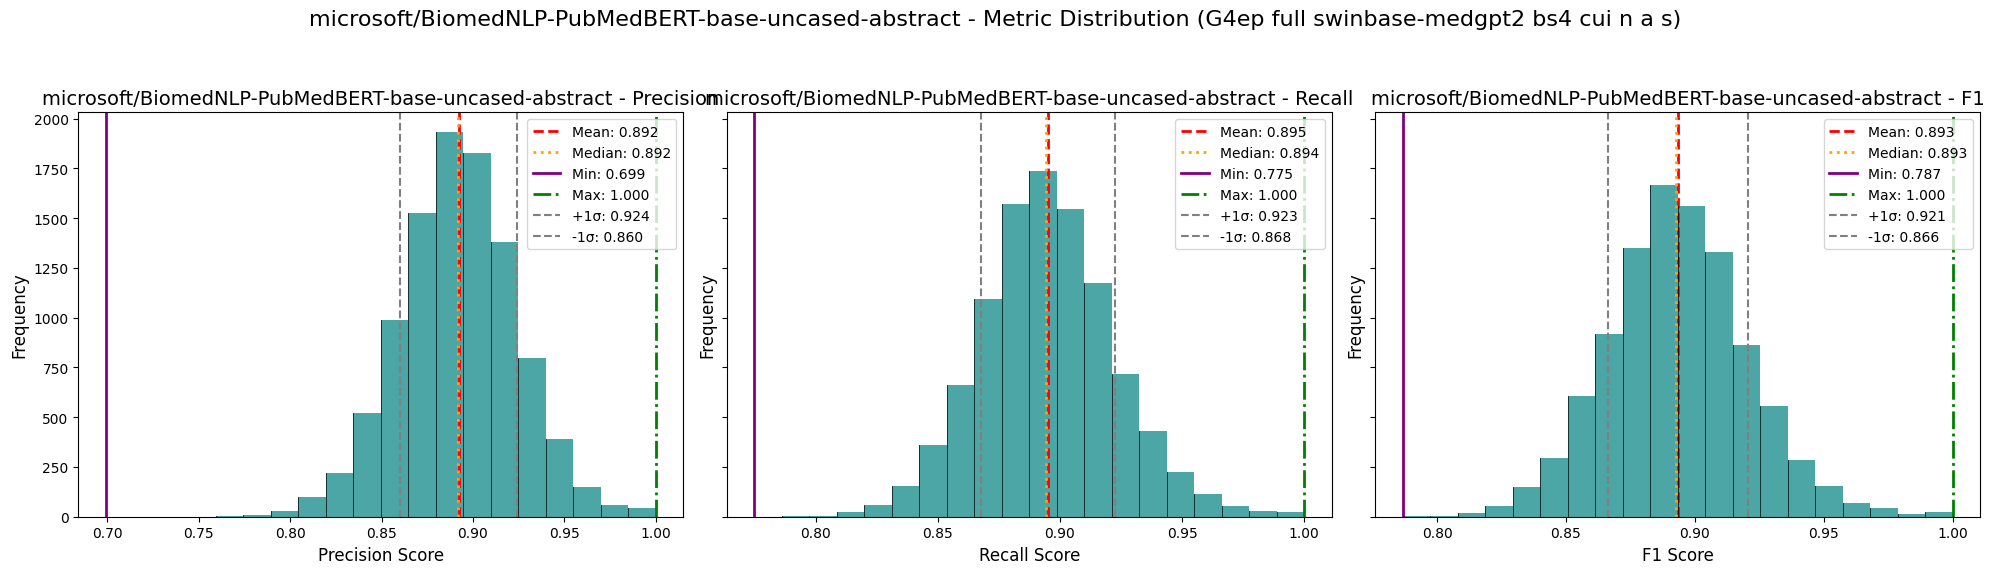

✅ Plot histogram disimpan di: /G4ep full swinbase-medgpt2 bs4 cui n a s_microsoft-BiomedNLP-PubMedBERT-base-uncased-abstract_metric_distribution.png


In [ ]:
for model_color in model_colors:
    color = model_colors.get(model_color, 'gray')
    plot_model_metrics_distribution(
        results_df=results_df,
        model_name=model_color,
        color = color
    )

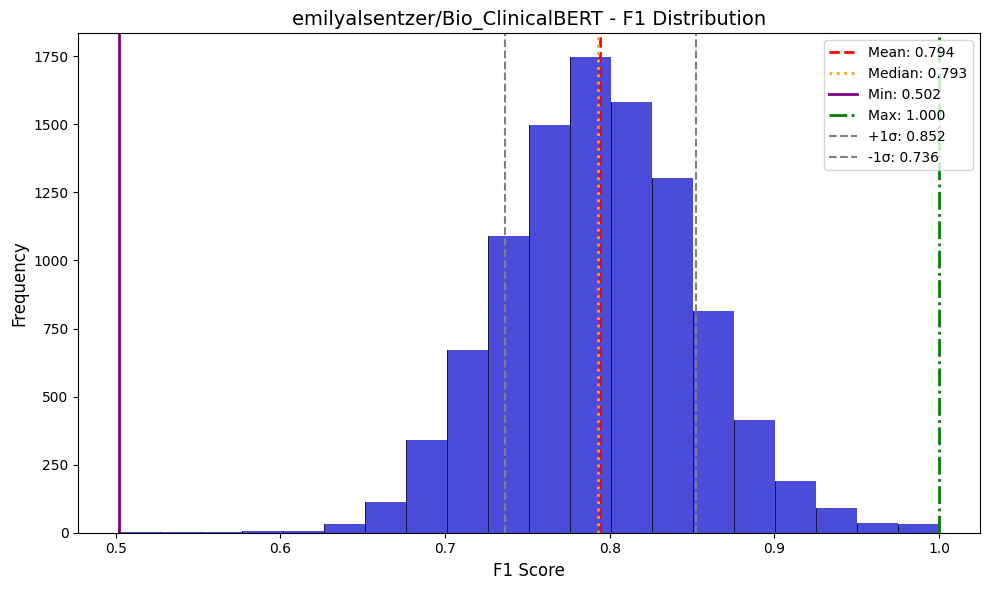

✅ Plot histogram disimpan di: /content/drive/My Drive/Kuliah/Thesis/Eksperimen/Hasil/Progress Report/22-06-25/G4ep full swinbase-medgpt2 bs4 cui n a s/G4ep full swinbase-medgpt2 bs4 cui n a s_emilyalsentzer-Bio_ClinicalBERT_F1_distribution.png


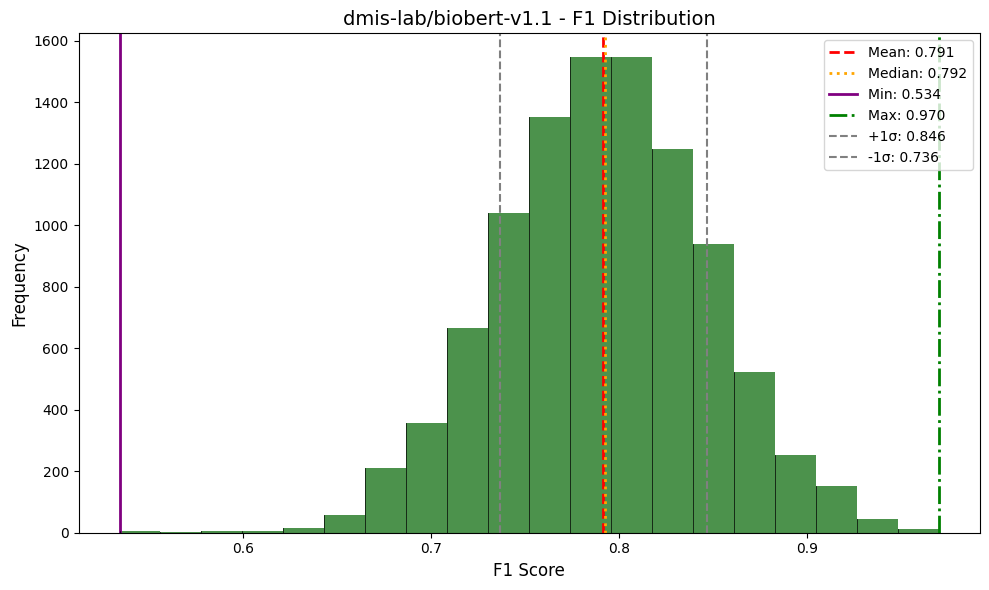

✅ Plot histogram disimpan di: /content/drive/My Drive/Kuliah/Thesis/Eksperimen/Hasil/Progress Report/22-06-25/G4ep full swinbase-medgpt2 bs4 cui n a s/G4ep full swinbase-medgpt2 bs4 cui n a s_dmis-lab-biobert-v1.1_F1_distribution.png


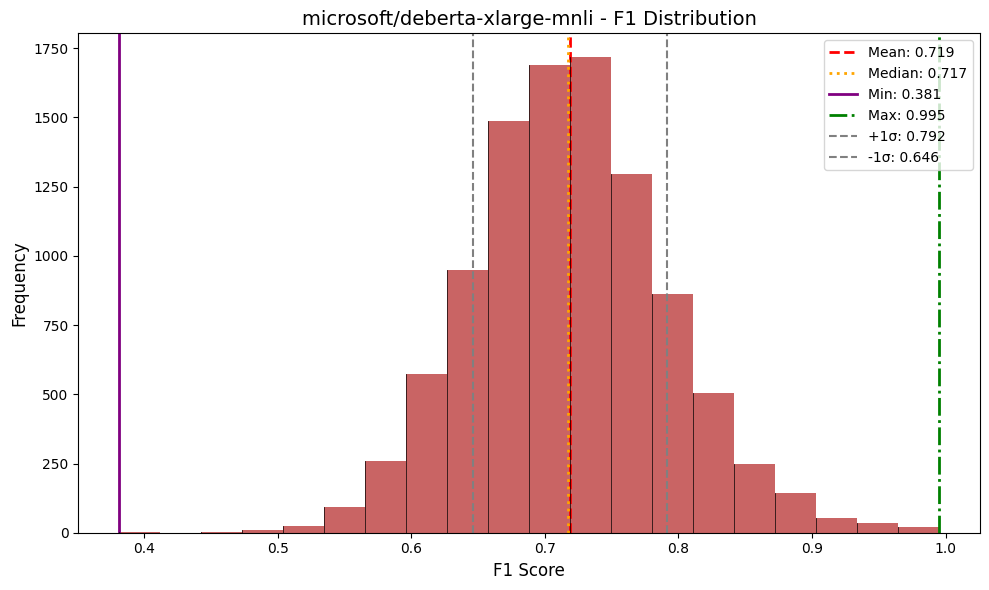

✅ Plot histogram disimpan di: /content/drive/My Drive/Kuliah/Thesis/Eksperimen/Hasil/Progress Report/22-06-25/G4ep full swinbase-medgpt2 bs4 cui n a s/G4ep full swinbase-medgpt2 bs4 cui n a s_microsoft-deberta-xlarge-mnli_F1_distribution.png


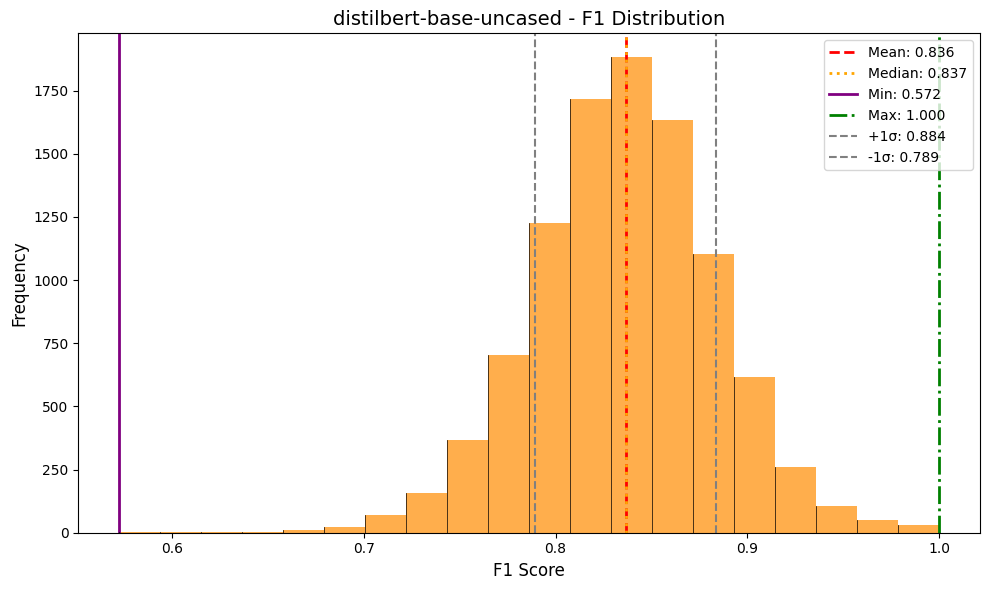

✅ Plot histogram disimpan di: /content/drive/My Drive/Kuliah/Thesis/Eksperimen/Hasil/Progress Report/22-06-25/G4ep full swinbase-medgpt2 bs4 cui n a s/G4ep full swinbase-medgpt2 bs4 cui n a s_distilbert-base-uncased_F1_distribution.png


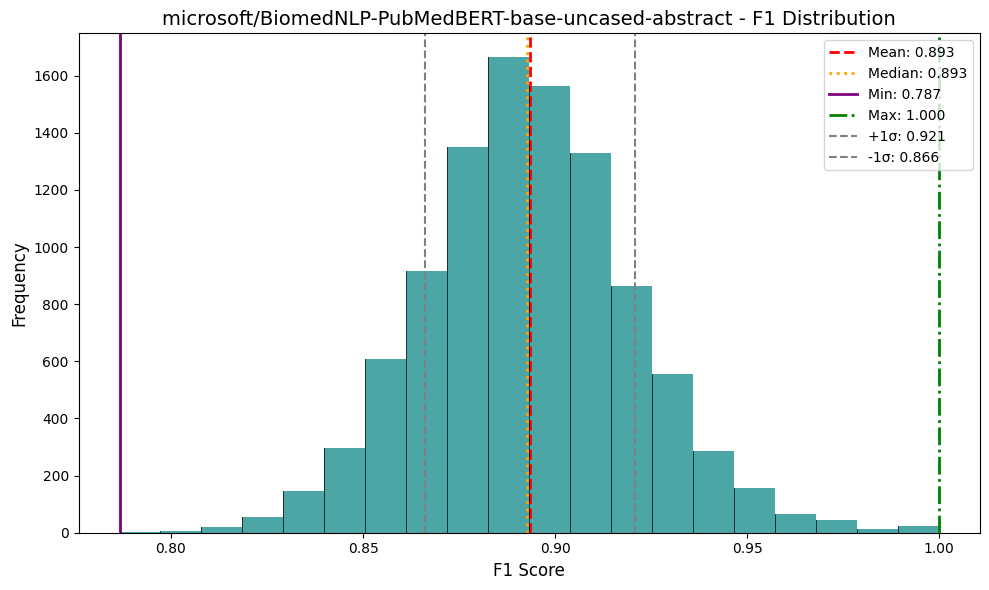

✅ Plot histogram disimpan di: /content/drive/My Drive/Kuliah/Thesis/Eksperimen/Hasil/Progress Report/22-06-25/G4ep full swinbase-medgpt2 bs4 cui n a s/G4ep full swinbase-medgpt2 bs4 cui n a s_microsoft-BiomedNLP-PubMedBERT-base-uncased-abstract_F1_distribution.png


In [ ]:
def plot_single_metric_distribution(results_df, model_name, color='skyblue',csv_name=csv_name, folder_path=folder_path, metric='F1'):
    """
    Buat histogram distribusi satu metrik (Precision, Recall, atau F1) untuk satu model,
    lengkap dengan garis mean, median, min, max, dan std.

    Args:
        results_df (pd.DataFrame): DataFrame yang berisi metrik model.
        model_name (str): Nama model (prefix kolom, seperti 'BioBERT').
        metric (str): Nama metrik ('Precision', 'Recall', atau 'F1').
        csv_name (str): Nama CSV/file untuk label dan nama file.
        folder_path (str): Path folder untuk menyimpan output plot.

    Returns:
        str: Path ke file gambar hasil simpan.
    """
    col = f"{model_name}_{metric}"

    if col not in results_df.columns:
        print(f"⚠️ Kolom '{col}' tidak ditemukan di DataFrame.")
        return None

    data = results_df[col].dropna()

    # Statistik
    mean_val = data.mean()
    median_val = data.median()
    std_val = data.std()
    min_val = data.min()
    max_val = data.max()

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    counts, bins, patches = ax.hist(data, bins=20, color=color, alpha=0.7)

    # Garis bantu statistik
    ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.3f}')
    ax.axvline(median_val, color='orange', linestyle='dotted', linewidth=2, label=f'Median: {median_val:.3f}')
    ax.axvline(min_val, color='purple', linestyle='solid', linewidth=2, label=f'Min: {min_val:.3f}')
    ax.axvline(max_val, color='green', linestyle='dashdot', linewidth=2, label=f'Max: {max_val:.3f}')
    ax.axvline(mean_val + std_val, color='gray', linestyle='dashed', linewidth=1.5, label=f'+1σ: {mean_val + std_val:.3f}')
    ax.axvline(mean_val - std_val, color='gray', linestyle='dashed', linewidth=1.5, label=f'-1σ: {mean_val - std_val:.3f}')

    # Tambahan garis vertikal per bar
    for count, x in zip(counts, bins):
        ax.plot([x, x], [0, count], color='black', linewidth=0.5)

    ax.set_title(f'{model_name} - {metric} Distribution', fontsize=14)
    ax.set_xlabel(f'{metric} Score', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend(fontsize=10)
    plt.tight_layout()

    # Simpan file
    model_safe = model_name.replace("/", "-")
    save_path = os.path.join(folder_path, f"{csv_name}_{model_safe}_{metric}_distribution.png")
    plt.savefig(save_path)
    plt.show()

    print(f"✅ Plot histogram disimpan di: {save_path}")
    return save_path

for model_color in model_colors:
    color = model_colors.get(model_color, 'gray')
    plot_single_metric_distribution(
        results_df=results_df,
        model_name=model_color,
        metric='F1',
        color = color
    )

In [ ]:
import evaluate

rouge_metric = evaluate.load("rouge")
bleu_metric = evaluate.load("bleu")

# Nama kolom referensi dan prediksi dalam dataset
ref_column = "Ref Caption"
pred_column = "Predicted Caption"

# Cek apakah kolom tersedia dalam dataset
if ref_column not in df.columns or pred_column not in df.columns:
    raise ValueError("Kolom referensi atau prediksi tidak ditemukan dalam dataset.")

references = df[ref_column].tolist()
# predictions = [pred.split('Question:')[0].strip() for pred in df[pred_column].tolist()]
predictions = df[pred_column].tolist()

# Dictionary awal
results_dict = {
    "Filename": df["Filename"].tolist(),
    "Ref Caption": references,
    "Predicted Caption": predictions
}

# Placeholder untuk skor
rouge_1_scores, rouge_2_scores, rouge_l_scores = [], [], []
bleu_1_scores, bleu_2_scores, bleu_3_scores, bleu_4_scores = [], [], [], []

# Loop evaluasi
for i in tqdm(range(len(predictions)), desc="Evaluating BLEU", ncols=100):
    ref = [references[i]]
    pred = [predictions[i]]

    # Skip jika prediksi kosong atau whitespace
    if not pred[0].strip():
        bleu_1_scores.append(0.0)
        bleu_2_scores.append(0.0)
        bleu_3_scores.append(0.0)
        bleu_4_scores.append(0.0)
        continue

    try:
        bleu_score = bleu_metric.compute(predictions=pred, references=ref)
        bleu_1_scores.append(bleu_score["precisions"][0])
        bleu_2_scores.append(bleu_score["precisions"][1])
        bleu_3_scores.append(bleu_score["precisions"][2])
        bleu_4_scores.append(bleu_score["precisions"][3])
    except ZeroDivisionError:
        # Jika tetap error, fallback ke 0
        bleu_1_scores.append(0.0)
        bleu_2_scores.append(0.0)
        bleu_3_scores.append(0.0)
        bleu_4_scores.append(0.0)

# Tambahkan ke dictionary
# results_dict["ROUGE-1"] = rouge_1_scores
# results_dict["ROUGE-2"] = rouge_2_scores
# results_dict["ROUGE-L"] = rouge_l_scores
results_dict["BLEU-1"] = bleu_1_scores
results_dict["BLEU-2"] = bleu_2_scores
results_dict["BLEU-3"] = bleu_3_scores
results_dict["BLEU-4"] = bleu_4_scores

# Buat DataFrame hasil
bleu_df = pd.DataFrame(results_dict)

# Tampilkan ringkasan statistik
summary = bleu_df[[
    # "ROUGE-1", "ROUGE-2", "ROUGE-L",
    "BLEU-1", "BLEU-2", "BLEU-3", "BLEU-4"
]].describe().T[["mean", "std", "min", "max"]]

print("\n📊 Ringkasan Skor ROUGE & BLEU:")
print(summary.round(4))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Evaluating ROUGE & BLEU: 100%|█████████████████████████████████| 9972/9972 [00:38<00:00, 259.09it/s]


📊 Ringkasan Skor ROUGE & BLEU:
          mean     std  min  max
BLEU-1  0.3936  0.1767  0.0  1.0
BLEU-2  0.1522  0.1552  0.0  1.0
BLEU-3  0.0742  0.1307  0.0  1.0
BLEU-4  0.0412  0.1060  0.0  1.0


In [ ]:
bleu_df

,Filename,Ref Caption,Predicted Caption,BLEU-1,BLEU-2,BLEU-3,BLEU-4
0,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_000001.jpg,"Computed tomography of the chest, axial view, demonstrates a large ascending aortic aneurysm.",contrast-enhanced computed tomography of the chest with intravenous contrast demonstrates a large right-sided pulmonary embolism.,0.500000,0.333333,0.214286,0.076923
1,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_000002.jpg,Computed tomography shows floating thrombosis.,intracardiac contrast-enhanced computed tomography angiography demonstrates a thrombosis in the left main coronary artery.,0.200000,0.000000,0.000000,0.000000
2,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_000003.jpg,Digitally subtracted angiogram demonstrates active extravasation of the superior rectal artery into the ileal-conduit.,embolization angiogram of the superior mesenteric artery.,0.750000,0.285714,0.166667,0.000000
3,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_000004.jpg,Digitally subtracted angiogram of the inferior mesenteric artery demonstrated cessation of flow through the proximal superior rectal artery in the region of the intersection between the artery and ureter with retained perfusion of the rectosigmoid region and resolution of active extravasation.,embolization angiogram demonstrates a pseudoaneurysm of the right internal iliac artery.,0.416667,0.090909,0.000000,0.000000
4,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_000005.jpg,Computed tomography demonstrates angle measurement of a Type 1 canal.,sagittal plain x-ray of the cranium.,0.285714,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
9967,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_009968.jpg,"The intra-atrial septum is absent near the superior vena cava, compatible with a sinus venosus atrial septal defect.","contrast-enhanced computed tomography scan of the chest shows a large, heterogeneously enhancing mass in the right lower lobe, consistent with a pulmonary embolus.",0.192308,0.040000,0.000000,0.000000
9968,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_009969.jpg,Partial anomalous pulmonary venous return of a right upper lobe pulmonary vein is seen to drain into the right superior vena cava instead of the left atrium. The main and right pulmonary arteries are dilated with respect to the ascending aorta.,"contrast-enhanced computed tomography of the chest shows a pseudoaneurysm of the ascending aorta, with the ascending aorta also visible.",0.476190,0.150000,0.052632,0.000000
9969,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_009970.jpg,Echocardiography performed three weeks after hospitalization.,-dimensional echocardiography demonstrates a left ventricular hypertrophy.,0.125000,0.000000,0.000000,0.000000
9970,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_009971.jpg,"Chest X-ray demonstrates a large right-sided pneumothorax with complete collapse of the right lung, and a shift of the mediastinum and heart to the left, consistent with tension pneumothorax. There is also a proximal density in the left lung, which may be related to the tension pneumothorax or residual consolidation.","postero-anterior chest plain x-ray demonstrates a right pneumothorax with mediastinal shift to the left, and a left-sided pleural effusion.",0.619048,0.350000,0.157895,0.055556


In [ ]:
# Misalnya: df, bleu_df, results_df sudah di-load sebelumnya
# Pastikan kolom 'Filename' di semua DataFrame sama format (strip whitespace jika perlu)
df['Filename'] = df['Filename'].str.strip()
bleu_df['Filename'] = bleu_df['Filename'].str.strip()
results_df['Filename'] = results_df['Filename'].str.strip()

# Gabungkan df + bleu_df (menggunakan Filename sebagai kunci)
merged = df[['ID', 'Filename', 'ROUGE-1 Score', 'ROUGE-2 Score', 'ROUGE-L Score']].merge(
    bleu_df[['Filename', 'Ref Caption', 'Predicted Caption', 'BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4']],
    on='Filename', how='left'
)

# Gabungkan lagi dengan results_df (pakai Filename)
merged = merged.merge(
    results_df[[
        'Filename',
        'microsoft/deberta-xlarge-mnli_Precision',
        'microsoft/deberta-xlarge-mnli_Recall',
        'microsoft/deberta-xlarge-mnli_F1',
        'emilyalsentzer/Bio_ClinicalBERT_Precision',
        'emilyalsentzer/Bio_ClinicalBERT_Recall',
        'emilyalsentzer/Bio_ClinicalBERT_F1'
    ]],
    on='Filename', how='left'
)

# Ganti nama kolom biar lebih rapi
merged_df = merged.rename(columns={
    'ROUGE-1 Score': 'ROUGE-1',
    'ROUGE-2 Score': 'ROUGE-2',
    'ROUGE-L Score': 'ROUGE-L',
    'microsoft/deberta-xlarge-mnli_Precision': 'BERTScore-Precision',
    'microsoft/deberta-xlarge-mnli_Recall': 'BERTScore-Recall',
    'microsoft/deberta-xlarge-mnli_F1': 'BERTScore-F1',
    'emilyalsentzer/Bio_ClinicalBERT_Precision': 'BioClinicalBertScore-Precision',
    'emilyalsentzer/Bio_ClinicalBERT_Recall': 'BioClinicalBertScore-Recall',
    'emilyalsentzer/Bio_ClinicalBERT_F1': 'BioClinicalBertScore-F1'
})
ordered_columns = [
    'ID',
    'Filename',
    'Ref Caption',
    'Predicted Caption',
    'BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4',
    'ROUGE-1', 'ROUGE-2', 'ROUGE-L',
    'BERTScore-Precision', 'BERTScore-Recall', 'BERTScore-F1',
    'BioClinicalBertScore-Precision', 'BioClinicalBertScore-Recall', 'BioClinicalBertScore-F1'
]

merged_df = merged_df[ordered_columns]
save_path = os.path.join(folder_path, f"{csv_name}_final_evaluation.csv")
merged_df.to_csv(save_path)
merged_df

,ID,Filename,Ref Caption,Predicted Caption,BLEU-1,BLEU-2,BLEU-3,BLEU-4,ROUGE-1,ROUGE-2,ROUGE-L,BERTScore-Precision,BERTScore-Recall,BERTScore-F1,BioClinicalBertScore-Precision,BioClinicalBertScore-Recall,BioClinicalBertScore-F1
0,0,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_000001.jpg,"Computed tomography of the chest, axial view, demonstrates a large ascending aortic aneurysm.",contrast-enhanced computed tomography of the chest with intravenous contrast demonstrates a large right-sided pulmonary embolism.,0.500000,0.333333,0.214286,0.076923,0.533333,0.428571,0.533333,0.742134,0.757977,0.749972,0.813843,0.842111,0.827736
1,1,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_000002.jpg,Computed tomography shows floating thrombosis.,intracardiac contrast-enhanced computed tomography angiography demonstrates a thrombosis in the left main coronary artery.,0.200000,0.000000,0.000000,0.000000,0.300000,0.111111,0.300000,0.676937,0.830590,0.745933,0.775542,0.888855,0.828341
2,2,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_000003.jpg,Digitally subtracted angiogram demonstrates active extravasation of the superior rectal artery into the ileal-conduit.,embolization angiogram of the superior mesenteric artery.,0.750000,0.285714,0.166667,0.000000,0.454545,0.200000,0.454545,0.807783,0.687816,0.742988,0.834340,0.765185,0.798268
3,3,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_000004.jpg,Digitally subtracted angiogram of the inferior mesenteric artery demonstrated cessation of flow through the proximal superior rectal artery in the region of the intersection between the artery and ureter with retained perfusion of the rectosigmoid region and resolution of active extravasation.,embolization angiogram demonstrates a pseudoaneurysm of the right internal iliac artery.,0.416667,0.090909,0.000000,0.000000,0.153846,0.040000,0.153846,0.722423,0.637486,0.677302,0.814424,0.752306,0.782134
4,4,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_000005.jpg,Computed tomography demonstrates angle measurement of a Type 1 canal.,sagittal plain x-ray of the cranium.,0.285714,0.000000,0.000000,0.000000,0.117647,0.000000,0.117647,0.665596,0.641161,0.653150,0.735041,0.735506,0.735273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9967,9967,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_009968.jpg,"The intra-atrial septum is absent near the superior vena cava, compatible with a sinus venosus atrial septal defect.","contrast-enhanced computed tomography scan of the chest shows a large, heterogeneously enhancing mass in the right lower lobe, consistent with a pulmonary embolus.",0.192308,0.040000,0.000000,0.000000,0.186047,0.048780,0.186047,0.627745,0.615191,0.621404,0.681880,0.656726,0.669067
9968,9968,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_009969.jpg,Partial anomalous pulmonary venous return of a right upper lobe pulmonary vein is seen to drain into the right superior vena cava instead of the left atrium. The main and right pulmonary arteries are dilated with respect to the ascending aorta.,"contrast-enhanced computed tomography of the chest shows a pseudoaneurysm of the ascending aorta, with the ascending aorta also visible.",0.476190,0.150000,0.052632,0.000000,0.295082,0.101695,0.262295,0.682401,0.599436,0.638234,0.781038,0.719780,0.749159
9969,9969,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_009970.jpg,Echocardiography performed three weeks after hospitalization.,-dimensional echocardiography demonstrates a left ventricular hypertrophy.,0.125000,0.000000,0.000000,0.000000,0.153846,0.000000,0.153846,0.687801,0.694716,0.691241,0.752114,0.775589,0.763671
9970,9970,/kaggle/input/rocov2-test/test/ROCOv2_2023_test_009971.jpg,"Chest X-ray demonstrates a large right-sided pneumothorax with complete collapse of the right lung, and a shift of the mediastinum and heart to the left, consistent with tension pneumothorax. There is also a proximal density in the left lung, which may be related to the tension pneumothorax or residua

/tmp/ipython-input-21-1383529758.py:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(metrics_to_plot))  # atau 'tab20', 'Set3', dst


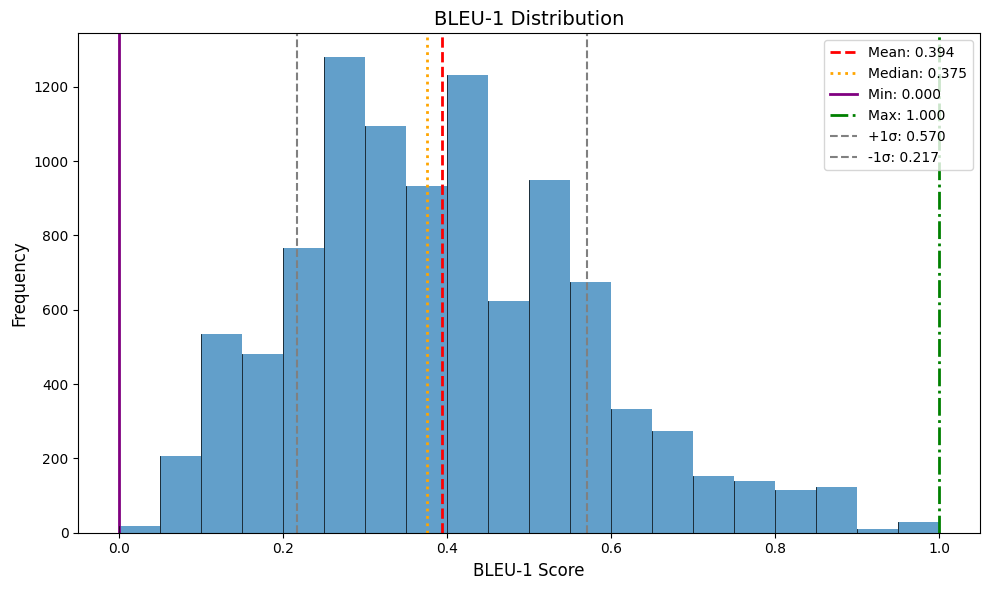

✅ Plot histogram disimpan di: /content/drive/My Drive/Kuliah/Thesis/Eksperimen/Hasil/Progress Report/22-06-25/G4ep full swinbase-medgpt2 bs4 cui n a s/G4ep full swinbase-medgpt2 bs4 cui n a s_BLEU-1_distribution.png


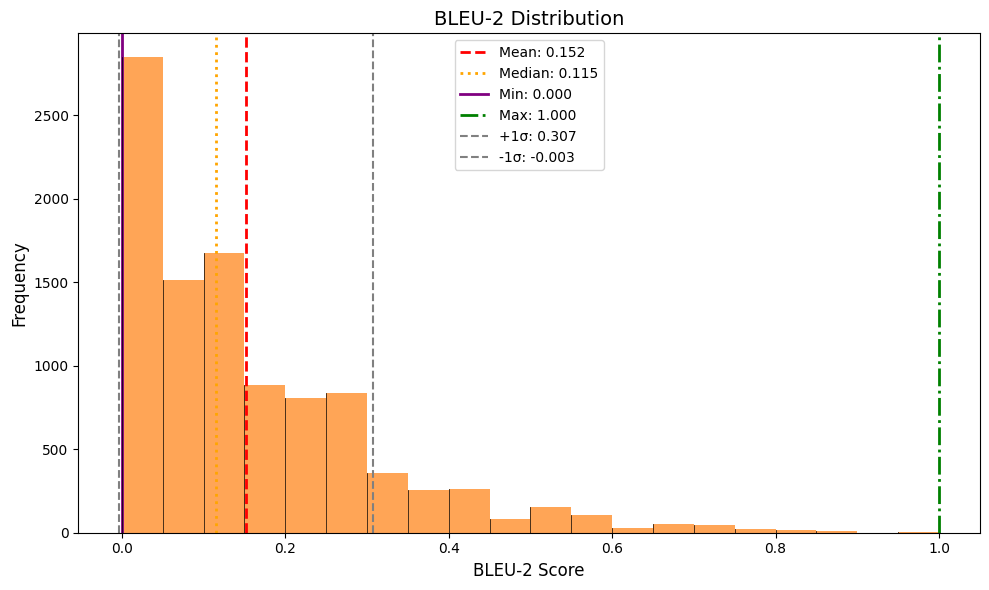

✅ Plot histogram disimpan di: /content/drive/My Drive/Kuliah/Thesis/Eksperimen/Hasil/Progress Report/22-06-25/G4ep full swinbase-medgpt2 bs4 cui n a s/G4ep full swinbase-medgpt2 bs4 cui n a s_BLEU-2_distribution.png


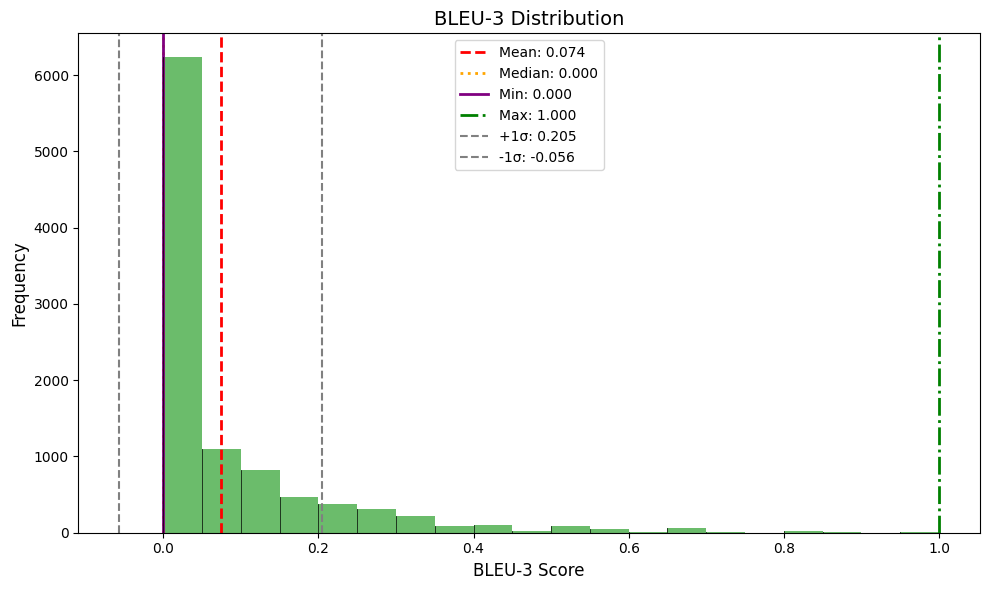

✅ Plot histogram disimpan di: /content/drive/My Drive/Kuliah/Thesis/Eksperimen/Hasil/Progress Report/22-06-25/G4ep full swinbase-medgpt2 bs4 cui n a s/G4ep full swinbase-medgpt2 bs4 cui n a s_BLEU-3_distribution.png


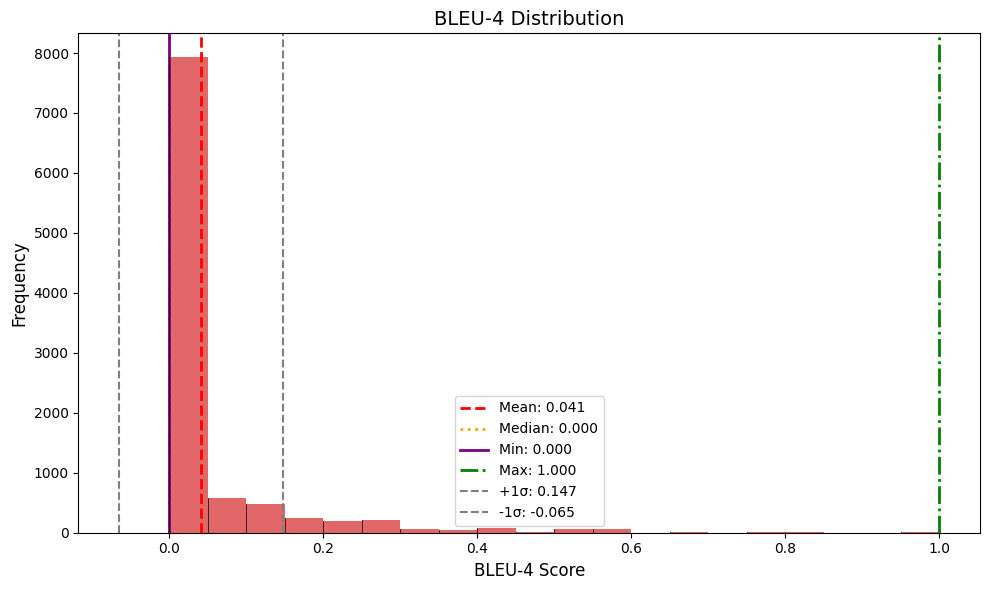

✅ Plot histogram disimpan di: /content/drive/My Drive/Kuliah/Thesis/Eksperimen/Hasil/Progress Report/22-06-25/G4ep full swinbase-medgpt2 bs4 cui n a s/G4ep full swinbase-medgpt2 bs4 cui n a s_BLEU-4_distribution.png


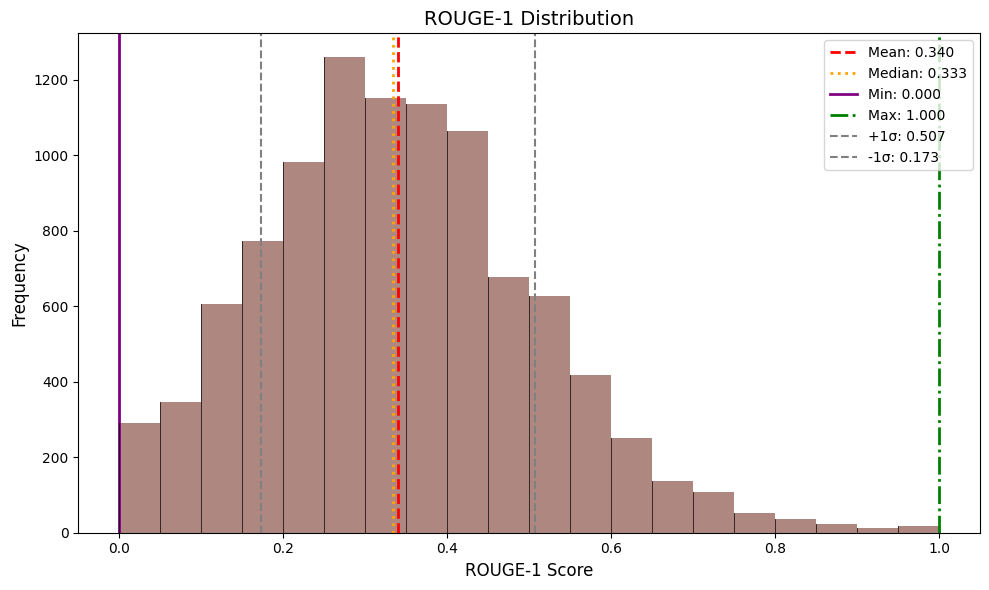

✅ Plot histogram disimpan di: /content/drive/My Drive/Kuliah/Thesis/Eksperimen/Hasil/Progress Report/22-06-25/G4ep full swinbase-medgpt2 bs4 cui n a s/G4ep full swinbase-medgpt2 bs4 cui n a s_ROUGE-1_distribution.png


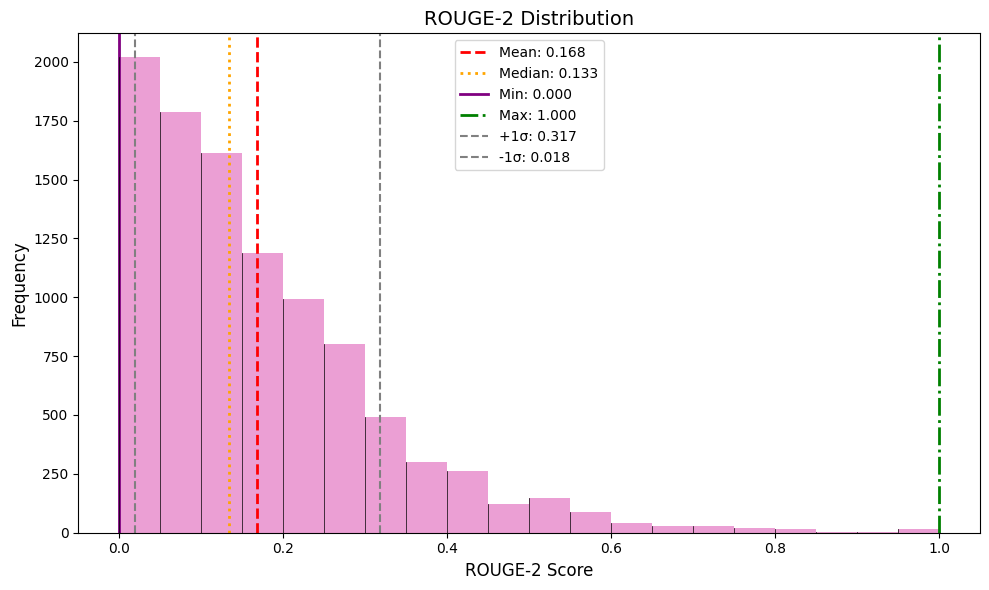

✅ Plot histogram disimpan di: /content/drive/My Drive/Kuliah/Thesis/Eksperimen/Hasil/Progress Report/22-06-25/G4ep full swinbase-medgpt2 bs4 cui n a s/G4ep full swinbase-medgpt2 bs4 cui n a s_ROUGE-2_distribution.png


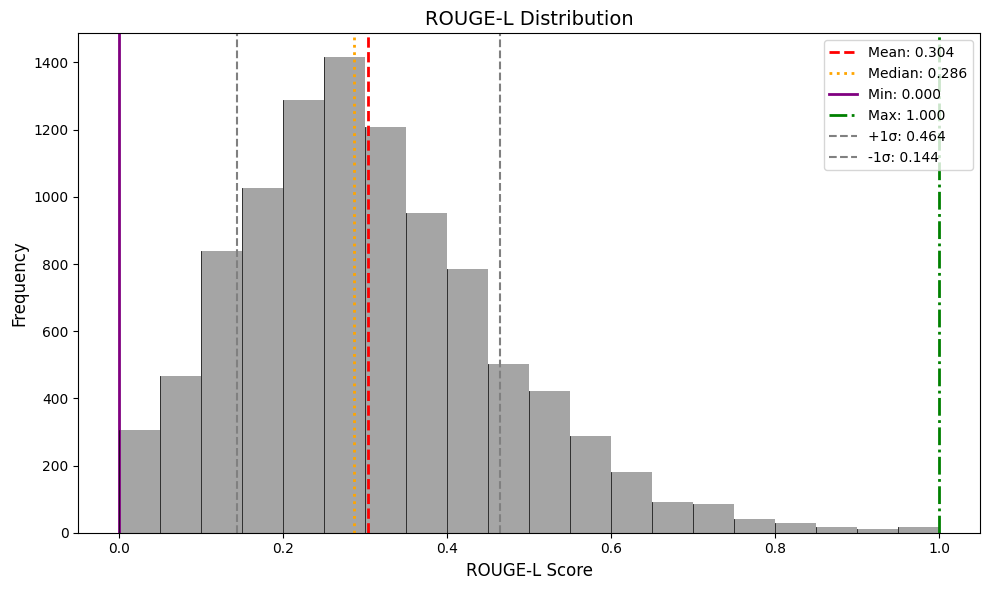

✅ Plot histogram disimpan di: /content/drive/My Drive/Kuliah/Thesis/Eksperimen/Hasil/Progress Report/22-06-25/G4ep full swinbase-medgpt2 bs4 cui n a s/G4ep full swinbase-medgpt2 bs4 cui n a s_ROUGE-L_distribution.png


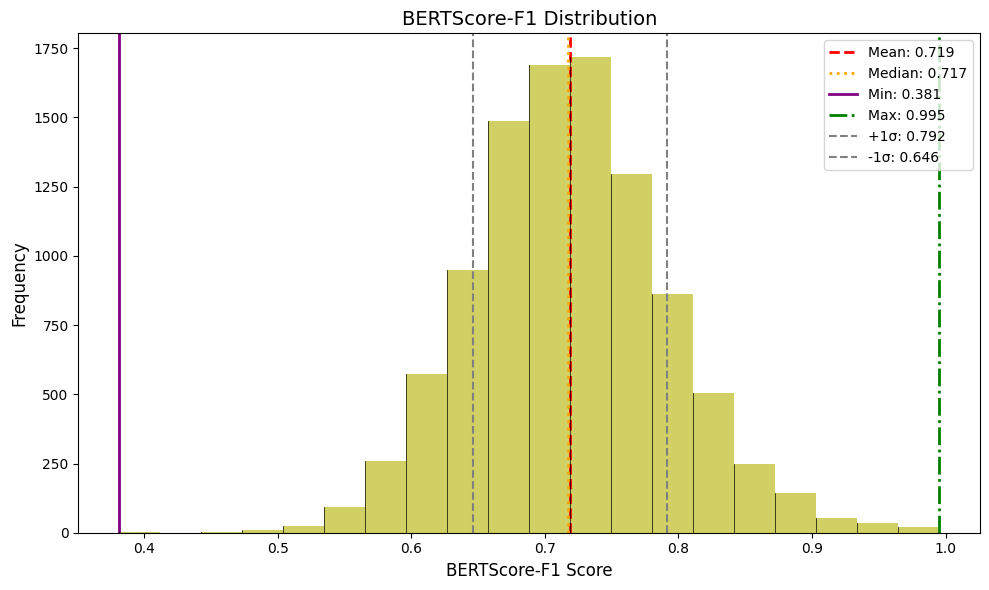

✅ Plot histogram disimpan di: /content/drive/My Drive/Kuliah/Thesis/Eksperimen/Hasil/Progress Report/22-06-25/G4ep full swinbase-medgpt2 bs4 cui n a s/G4ep full swinbase-medgpt2 bs4 cui n a s_BERTScore-F1_distribution.png


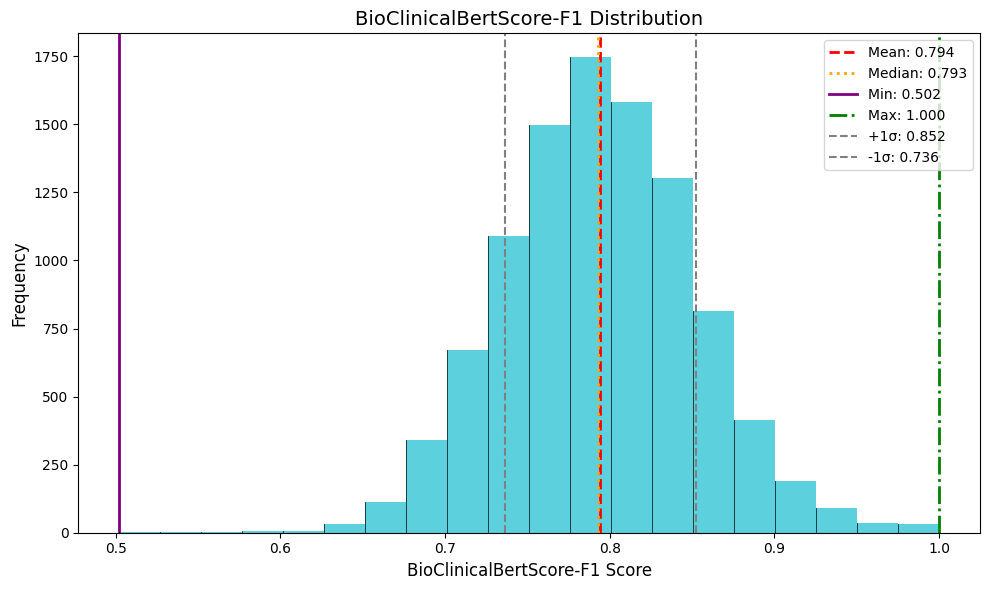

✅ Plot histogram disimpan di: /content/drive/My Drive/Kuliah/Thesis/Eksperimen/Hasil/Progress Report/22-06-25/G4ep full swinbase-medgpt2 bs4 cui n a s/G4ep full swinbase-medgpt2 bs4 cui n a s_BioClinicalBertScore-F1_distribution.png


In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def plot_metric_distribution(
    df,
    metric_col,
    color='skyblue',
    csv_name=csv_name,
    folder_path=folder_path
):
    """
    Plot histogram distribusi satu metrik dari kolom tertentu.

    Args:
        df (pd.DataFrame): DataFrame yang berisi skor.
        metric_col (str): Nama kolom metrik yang akan diplot.
        color (str): Warna histogram.
        csv_name (str): Nama file untuk label/simpan.
        folder_path (str): Folder untuk menyimpan gambar.

    Returns:
        str: Path file gambar hasil simpan.
    """
    if metric_col not in df.columns:
        print(f"⚠️ Kolom '{metric_col}' tidak ditemukan di DataFrame.")
        return None

    data = df[metric_col].dropna()

    if len(data) == 0:
        print(f"⚠️ Tidak ada data pada kolom '{metric_col}'.")
        return None

    mean_val = data.mean()
    median_val = data.median()
    std_val = data.std()
    min_val = data.min()
    max_val = data.max()

    fig, ax = plt.subplots(figsize=(10, 6))
    counts, bins, _ = ax.hist(data, bins=20, color=color, alpha=0.7)

    ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.3f}')
    ax.axvline(median_val, color='orange', linestyle='dotted', linewidth=2, label=f'Median: {median_val:.3f}')
    ax.axvline(min_val, color='purple', linestyle='solid', linewidth=2, label=f'Min: {min_val:.3f}')
    ax.axvline(max_val, color='green', linestyle='dashdot', linewidth=2, label=f'Max: {max_val:.3f}')
    ax.axvline(mean_val + std_val, color='gray', linestyle='dashed', linewidth=1.5, label=f'+1σ: {mean_val + std_val:.3f}')
    ax.axvline(mean_val - std_val, color='gray', linestyle='dashed', linewidth=1.5, label=f'-1σ: {mean_val - std_val:.3f}')

    for count, x in zip(counts, bins):
        ax.plot([x, x], [0, count], color='black', linewidth=0.5)

    ax.set_title(f"{metric_col} Distribution", fontsize=14)
    ax.set_xlabel(f"{metric_col} Score", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.legend(fontsize=10)
    plt.tight_layout()

    os.makedirs(folder_path, exist_ok=True)
    safe_col = metric_col.replace(" ", "_").replace("/", "-")
    save_path = os.path.join(folder_path, f"{csv_name}_{safe_col}_distribution.png")
    plt.savefig(save_path)
    plt.show()

    print(f"✅ Plot histogram disimpan di: {save_path}")
    return save_path

# Daftar metrik yang ingin diplot
metrics_to_plot = [
    "BLEU-1", "BLEU-2", "BLEU-3", "BLEU-4",
    "ROUGE-1", "ROUGE-2", "ROUGE-L",
    "BERTScore-F1", "BioClinicalBertScore-F1"
]

# Ambil colormap untuk variasi warna otomatis
cmap = cm.get_cmap('tab10', len(metrics_to_plot))  # atau 'tab20', 'Set3', dst

for i, metric in enumerate(metrics_to_plot):
    color = cmap(i)  # ambil warna berbeda
    plot_metric_distribution(
        df=merged_df,
        metric_col=metric,
        color=color,
    )